In [3]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, auc, accuracy_score
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools

# ----設定繪圖-------
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft Dexter'] 
plt.rcParams['axes.unicode_minus'] = False  
from matplotlib.font_manager import FontProperties 
import seaborn as sns 
myfont=FontProperties(fname='Microsoft JhengHei',size=14) 
sns.set(font=myfont.get_family()) 
sns.set_style("darkgrid",{"font.sans-serif":['Microsoft Dexter']}) 

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,f1_score,r2_score,recall_score,roc_auc_score,precision_recall_curve,roc_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_predict,cross_val_score

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_seq_items = None

In [5]:
from datetime import datetime as dt
import time

### 原始數據

In [6]:
names = ['DDwFD', 'contractsn', 'DATE', 'DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nconcompli', 'nmatcompla',
       'nmatcompli', 'nteccompla', 'accLIKE', 'proLIKE', 'accDLIKE',
       'proDLIKE', 'FavorCNT', 'BlockCNT', 'AddFavorCNT', 'AddBlockCNT',
       'star', 'isIntCNT', 'LVdiffCNT', 'MGMLead', 'MGMRes', 'MGMDemo',
       'MGMDeal', 'conUUCCNT', 'conSOUCNT', 'conSERCNT', 'conTWBCNT',
       'conOTHCNT', 'conLigCNT', 'conMedCNT', 'conTanCNT', 'conDarCNT',
       'conEx01CNT', 'conEx03CNT', 'conEx12CNT', 'conEx24CNT', 'conage30CNT',
       'conage40CNT', 'conage50CNT', 'conage60CNT', 'conage61CNT', 'conMCNT',
       'conFCNT', 'helpCNT', 'helpCNTmax', 'help3mCNT', 'help3mCNTmax',
       'helpITCNT', 'helpITCNTmax', 'helpIT3mCNT', 'helpIT3mCNTmax',
       'helpIiCNT', 'helpIiCNTmax', 'helpIi3mCNT', 'helpIi3mCNTmax',
       'helpMaCNT', 'helpMaCNTmax', 'helpMa3mCNT', 'helpMa3mCNTmax',
       'helpTeCNT', 'helpTeCNTmax', 'helpTe3mCNT', 'helpTe3mCNTmax',
       'helpconCNT', 'helpconCNTmax', 'helpcon3mCNT', 'helpcon3mCNTmax',
       'ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR',
       'ALL_nTR', 'ALL_nconcompla', 'ALL_nconcompli', 'ALL_nmatcompla',
       'ALL_nmatcompli', 'ALL_nteccompla', 'ALL_accLIKE', 'ALL_proLIKE',
       'ALL_accDLIKE', 'ALL_proDLIKE', 'ALL_FavorCNT', 'ALL_BlockCNT',
       'ALL_AddFavorCNT', 'ALL_AddBlockCNT', 'ALL_star', 'ALL_isIntCNT',
       'ALL_LVdiffCNT', 'ALL_MGMLead', 'ALL_MGMRes', 'ALL_MGMDemo',
       'ALL_MGMDeal', 'ALL_conUUCCNT', 'ALL_conSOUCNT', 'ALL_conSERCNT',
       'ALL_conTWBCNT', 'ALL_conOTHCNT', 'ALL_conLigCNT', 'ALL_conMedCNT',
       'ALL_conTanCNT', 'ALL_conDarCNT', 'ALL_conEx01CNT', 'ALL_conEx03CNT',
       'ALL_conEx12CNT', 'ALL_conEx24CNT', 'ALL_conage30CNT',
       'ALL_conage40CNT', 'ALL_conage50CNT', 'ALL_conage60CNT',
       'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT', 'ALL_helpCNT',
       'ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax', 'ALL_helpITCNT',
       'ALL_helpITCNTmax', 'ALL_helpIT3mCNT', 'ALL_helpIT3mCNTmax',
       'ALL_helpIiCNT', 'ALL_helpIiCNTmax', 'ALL_helpIi3mCNT',
       'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT', 'ALL_helpMaCNTmax',
       'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax', 'ALL_helpTeCNT',
       'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT', 'ALL_helpTe3mCNTmax',
       'ALL_helpconCNT', 'ALL_helpconCNTmax', 'ALL_helpcon3mCNT',
       'ALL_helpcon3mCNTmax', 'L1D_RH', 'L1D_AH', 'L1D_re', 'L1D_fbCNT',
       'L1D_nCR', 'L1D_nMR', 'L1D_nTR', 'L1D_nconcompla', 'L1D_nconcompli',
       'L1D_nmatcompla', 'L1D_nmatcompli', 'L1D_nteccompla', 'L1D_accLIKE',
       'L1D_proLIKE', 'L1D_accDLIKE', 'L1D_proDLIKE', 'L1D_FavorCNT',
       'L1D_BlockCNT', 'L1D_AddFavorCNT', 'L1D_AddBlockCNT', 'L1D_star',
       'L1D_isIntCNT', 'L1D_LVdiffCNT', 'L1D_MGMLead', 'L1D_MGMRes',
       'L1D_MGMDemo', 'L1D_MGMDeal', 'L1D_conUUCCNT', 'L1D_conSOUCNT',
       'L1D_conSERCNT', 'L1D_conTWBCNT', 'L1D_conOTHCNT', 'L1D_conLigCNT',
       'L1D_conMedCNT', 'L1D_conTanCNT', 'L1D_conDarCNT', 'L1D_conEx01CNT',
       'L1D_conEx03CNT', 'L1D_conEx12CNT', 'L1D_conEx24CNT', 'L1D_conage30CNT',
       'L1D_conage40CNT', 'L1D_conage50CNT', 'L1D_conage60CNT',
       'L1D_conage61CNT', 'L1D_conMCNT', 'L1D_conFCNT', 'L1D_helpCNT',
       'L1D_helpCNTmax', 'L1D_help3mCNT', 'L1D_help3mCNTmax', 'L1D_helpITCNT',
       'L1D_helpITCNTmax', 'L1D_helpIT3mCNT', 'L1D_helpIT3mCNTmax',
       'L1D_helpIiCNT', 'L1D_helpIiCNTmax', 'L1D_helpIi3mCNT',
       'L1D_helpIi3mCNTmax', 'L1D_helpMaCNT', 'L1D_helpMaCNTmax',
       'L1D_helpMa3mCNT', 'L1D_helpMa3mCNTmax', 'L1D_helpTeCNT',
       'L1D_helpTeCNTmax', 'L1D_helpTe3mCNT', 'L1D_helpTe3mCNTmax',
       'L1D_helpconCNT', 'L1D_helpconCNTmax', 'L1D_helpcon3mCNT',
       'L1D_helpcon3mCNTmax', 'L3D_RH', 'L3D_AH', 'L3D_re', 'L3D_fbCNT',
       'L3D_nCR', 'L3D_nMR', 'L3D_nTR', 'L3D_nconcompla', 'L3D_nconcompli',
       'L3D_nmatcompla', 'L3D_nmatcompli', 'L3D_nteccompla', 'L3D_accLIKE',
       'L3D_proLIKE', 'L3D_accDLIKE', 'L3D_proDLIKE', 'L3D_FavorCNT',
       'L3D_BlockCNT', 'L3D_AddFavorCNT', 'L3D_AddBlockCNT', 'L3D_star',
       'L3D_isIntCNT', 'L3D_LVdiffCNT', 'L3D_MGMLead', 'L3D_MGMRes',
       'L3D_MGMDemo', 'L3D_MGMDeal', 'L3D_conUUCCNT', 'L3D_conSOUCNT',
       'L3D_conSERCNT', 'L3D_conTWBCNT', 'L3D_conOTHCNT', 'L3D_conLigCNT',
       'L3D_conMedCNT', 'L3D_conTanCNT', 'L3D_conDarCNT', 'L3D_conEx01CNT',
       'L3D_conEx03CNT', 'L3D_conEx12CNT', 'L3D_conEx24CNT', 'L3D_conage30CNT',
       'L3D_conage40CNT', 'L3D_conage50CNT', 'L3D_conage60CNT',
       'L3D_conage61CNT', 'L3D_conMCNT', 'L3D_conFCNT', 'L3D_helpCNT',
       'L3D_helpCNTmax', 'L3D_help3mCNT', 'L3D_help3mCNTmax', 'L3D_helpITCNT',
       'L3D_helpITCNTmax', 'L3D_helpIT3mCNT', 'L3D_helpIT3mCNTmax',
       'L3D_helpIiCNT', 'L3D_helpIiCNTmax', 'L3D_helpIi3mCNT',
       'L3D_helpIi3mCNTmax', 'L3D_helpMaCNT', 'L3D_helpMaCNTmax',
       'L3D_helpMa3mCNT', 'L3D_helpMa3mCNTmax', 'L3D_helpTeCNT',
       'L3D_helpTeCNTmax', 'L3D_helpTe3mCNT', 'L3D_helpTe3mCNTmax',
       'L3D_helpconCNT', 'L3D_helpconCNTmax', 'L3D_helpcon3mCNT',
       'L3D_helpcon3mCNTmax', 'L7D_RH', 'L7D_AH', 'L7D_re', 'L7D_fbCNT',
       'L7D_nCR', 'L7D_nMR', 'L7D_nTR', 'L7D_nconcompla', 'L7D_nconcompli',
       'L7D_nmatcompla', 'L7D_nmatcompli', 'L7D_nteccompla', 'L7D_accLIKE',
       'L7D_proLIKE', 'L7D_accDLIKE', 'L7D_proDLIKE', 'L7D_FavorCNT',
       'L7D_BlockCNT', 'L7D_AddFavorCNT', 'L7D_AddBlockCNT', 'L7D_star',
       'L7D_isIntCNT', 'L7D_LVdiffCNT', 'L7D_MGMLead', 'L7D_MGMRes',
       'L7D_MGMDemo', 'L7D_MGMDeal', 'L7D_conUUCCNT', 'L7D_conSOUCNT',
       'L7D_conSERCNT', 'L7D_conTWBCNT', 'L7D_conOTHCNT', 'L7D_conLigCNT',
       'L7D_conMedCNT', 'L7D_conTanCNT', 'L7D_conDarCNT', 'L7D_conEx01CNT',
       'L7D_conEx03CNT', 'L7D_conEx12CNT', 'L7D_conEx24CNT', 'L7D_conage30CNT',
       'L7D_conage40CNT', 'L7D_conage50CNT', 'L7D_conage60CNT',
       'L7D_conage61CNT', 'L7D_conMCNT', 'L7D_conFCNT', 'L7D_helpCNT',
       'L7D_helpCNTmax', 'L7D_help3mCNT', 'L7D_help3mCNTmax', 'L7D_helpITCNT',
       'L7D_helpITCNTmax', 'L7D_helpIT3mCNT', 'L7D_helpIT3mCNTmax',
       'L7D_helpIiCNT', 'L7D_helpIiCNTmax', 'L7D_helpIi3mCNT',
       'L7D_helpIi3mCNTmax', 'L7D_helpMaCNT', 'L7D_helpMaCNTmax',
       'L7D_helpMa3mCNT', 'L7D_helpMa3mCNTmax', 'L7D_helpTeCNT',
       'L7D_helpTeCNTmax', 'L7D_helpTe3mCNT', 'L7D_helpTe3mCNTmax',
       'L7D_helpconCNT', 'L7D_helpconCNTmax', 'L7D_helpcon3mCNT',
       'L7D_helpcon3mCNTmax', 'L14D_RH', 'L14D_AH', 'L14D_re', 'L14D_fbCNT',
       'L14D_nCR', 'L14D_nMR', 'L14D_nTR', 'L14D_nconcompla',
       'L14D_nconcompli', 'L14D_nmatcompla', 'L14D_nmatcompli',
       'L14D_nteccompla', 'L14D_accLIKE', 'L14D_proLIKE', 'L14D_accDLIKE',
       'L14D_proDLIKE', 'L14D_FavorCNT', 'L14D_BlockCNT', 'L14D_AddFavorCNT',
       'L14D_AddBlockCNT', 'L14D_star', 'L14D_isIntCNT', 'L14D_LVdiffCNT',
       'L14D_MGMLead', 'L14D_MGMRes', 'L14D_MGMDemo', 'L14D_MGMDeal',
       'L14D_conUUCCNT', 'L14D_conSOUCNT', 'L14D_conSERCNT', 'L14D_conTWBCNT',
       'L14D_conOTHCNT', 'L14D_conLigCNT', 'L14D_conMedCNT', 'L14D_conTanCNT',
       'L14D_conDarCNT', 'L14D_conEx01CNT', 'L14D_conEx03CNT',
       'L14D_conEx12CNT', 'L14D_conEx24CNT', 'L14D_conage30CNT',
       'L14D_conage40CNT', 'L14D_conage50CNT', 'L14D_conage60CNT',
       'L14D_conage61CNT', 'L14D_conMCNT', 'L14D_conFCNT', 'L14D_helpCNT',
       'L14D_helpCNTmax', 'L14D_help3mCNT', 'L14D_help3mCNTmax',
       'L14D_helpITCNT', 'L14D_helpITCNTmax', 'L14D_helpIT3mCNT',
       'L14D_helpIT3mCNTmax', 'L14D_helpIiCNT', 'L14D_helpIiCNTmax',
       'L14D_helpIi3mCNT', 'L14D_helpIi3mCNTmax', 'L14D_helpMaCNT',
       'L14D_helpMaCNTmax', 'L14D_helpMa3mCNT', 'L14D_helpMa3mCNTmax',
       'L14D_helpTeCNT', 'L14D_helpTeCNTmax', 'L14D_helpTe3mCNT',
       'L14D_helpTe3mCNTmax', 'L14D_helpconCNT', 'L14D_helpconCNTmax',
       'L14D_helpcon3mCNT', 'L14D_helpcon3mCNTmax', 'FDsellingdate',
       'product_sdate', 'mb', 'mb_STV', 'mbdate', 'WarrantyPeriod', 'mbaCNT',
       'mbadate_First', 'mbadate_New', 'MBA_technical', 'MBA_customer',
       'MBA_Scheduling', 'MBA_Class', 'MBA_Service']

In [7]:
df = pd.read_csv('D:/karma5.0/0121/datasets_half.csv',names=names)

In [21]:
dff_all = df[['DDwFD', 'contractsn', 'DATE', 'DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nconcompli', 'nmatcompla',
       'nmatcompli', 'nteccompla', 'accLIKE', 'proLIKE', 'accDLIKE',
       'proDLIKE', 'FavorCNT', 'BlockCNT', 'AddFavorCNT', 'AddBlockCNT',
       'star', 'isIntCNT', 'LVdiffCNT', 'MGMLead', 'MGMRes', 'MGMDemo',
       'MGMDeal', 'conUUCCNT', 'conSOUCNT', 'conSERCNT', 'conTWBCNT',
       'conOTHCNT', 'conLigCNT', 'conMedCNT', 'conTanCNT', 'conDarCNT',
       'conEx01CNT', 'conEx03CNT', 'conEx12CNT', 'conEx24CNT', 'conage30CNT',
       'conage40CNT', 'conage50CNT', 'conage60CNT', 'conage61CNT', 'conMCNT',
       'conFCNT', 'helpCNT', 'helpCNTmax', 'help3mCNT', 'help3mCNTmax',
       'helpITCNT', 'helpITCNTmax', 'helpIT3mCNT', 'helpIT3mCNTmax',
       'helpIiCNT', 'helpIiCNTmax', 'helpIi3mCNT', 'helpIi3mCNTmax',
       'helpMaCNT', 'helpMaCNTmax', 'helpMa3mCNT', 'helpMa3mCNTmax',
       'helpTeCNT', 'helpTeCNTmax', 'helpTe3mCNT', 'helpTe3mCNTmax',
       'helpconCNT', 'helpconCNTmax', 'helpcon3mCNT', 'helpcon3mCNTmax',
       'ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR',
       'ALL_nTR', 'ALL_nconcompla', 'ALL_nconcompli', 'ALL_nmatcompla',
       'ALL_nmatcompli', 'ALL_nteccompla', 'ALL_accLIKE', 'ALL_proLIKE',
       'ALL_accDLIKE', 'ALL_proDLIKE', 'ALL_FavorCNT', 'ALL_BlockCNT',
       'ALL_AddFavorCNT', 'ALL_AddBlockCNT', 'ALL_star', 'ALL_isIntCNT',
       'ALL_LVdiffCNT', 'ALL_MGMLead', 'ALL_MGMRes', 'ALL_MGMDemo',
       'ALL_MGMDeal', 'ALL_conUUCCNT', 'ALL_conSOUCNT', 'ALL_conSERCNT',
       'ALL_conTWBCNT', 'ALL_conOTHCNT', 'ALL_conLigCNT', 'ALL_conMedCNT',
       'ALL_conTanCNT', 'ALL_conDarCNT', 'ALL_conEx01CNT', 'ALL_conEx03CNT',
       'ALL_conEx12CNT', 'ALL_conEx24CNT', 'ALL_conage30CNT',
       'ALL_conage40CNT', 'ALL_conage50CNT', 'ALL_conage60CNT',
       'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT', 'ALL_helpCNT',
       'ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax', 'ALL_helpITCNT',
       'ALL_helpITCNTmax', 'ALL_helpIT3mCNT', 'ALL_helpIT3mCNTmax',
       'ALL_helpIiCNT', 'ALL_helpIiCNTmax', 'ALL_helpIi3mCNT',
       'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT', 'ALL_helpMaCNTmax',
       'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax', 'ALL_helpTeCNT',
       'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT', 'ALL_helpTe3mCNTmax',
       'ALL_helpconCNT', 'ALL_helpconCNTmax', 'ALL_helpcon3mCNT',
       'ALL_helpcon3mCNTmax','FDsellingdate',
       'product_sdate', 'mb', 'mb_STV', 'mbdate', 'WarrantyPeriod', 'mbaCNT',
       'mbadate_First', 'mbadate_New', 'MBA_technical', 'MBA_customer',
       'MBA_Scheduling', 'MBA_Class', 'MBA_Service']]

In [85]:
df_month =dff_all[dff_all['DDwFD']<=30]

In [ ]:
df_month['ALL_star'] = df_month['ALL_star'].replace()
df_month['MBA_technical'] = df_month['MBA_technical'].fillna(0)
df_month['MBA_customer'] = df_month['MBA_customer'].fillna(0)
df_month['MBA_Scheduling'] = df_month['MBA_Scheduling'].fillna(0)
df_month['MBA_Class'] = df_month['MBA_Class'].fillna(0)
df_month['MBA_Service'] = df_month['MBA_Service'].fillna(0)
df_month['MBA_total']=df_month['MBA_Class']+df_month['MBA_Scheduling']+df_month['MBA_Service']+df_month['MBA_customer']+df_month['MBA_technical']
df_month['mbadate_First']=pd.to_datetime(df_month['mbadate_First']).dt.date
df_month['mbadate_New']=pd.to_datetime(df_month['mbadate_New']).dt.date
df_month['FDsellingdate']=pd.to_datetime(df_month['FDsellingdate']).dt.date
df_month['mbdate']=pd.to_datetime(df_month['mbdate']).dt.date
df_month['mbadiff'] = df_month['mbadate_New']-df_month['mbadate_First']
df_month['mbtime'] = df_month['mbdate']-df_month['FDsellingdate']
df_month['mbaFtoSelltime'] = df_month['mbadate_First']-df_month['FDsellingdate']
df_month['mbaNtoSelltime'] = df_month['mbadate_New']-df_month['FDsellingdate']
df_month['mbFdiff'] = df_month['mbdate']-df_month['mbadate_First']
df_month['mbNdiff'] = df_month['mbdate']-df_month['mbadate_New']
df_month = df_month.drop(['MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service'],axis=1)
df_month = df_month.drop(['ALL_nconcompli','ALL_nmatcompli'],axis=1)
df_month = df_month.drop(['product_sdate','mbadate_First','mbadate_New','FDsellingdate'],axis=1)
df_month = df_month.drop(['WarrantyPeriod'],axis=1)

df_month['mbadiff'] = (df_month['mbadiff'] / np.timedelta64(1, 'D')).astype(float)
df_month['mbaFtoSelltime'] = (df_month['mbaFtoSelltime'] / np.timedelta64(1, 'D')).astype(float)
df_month['mbaNtoSelltime'] = (df_month['mbaNtoSelltime'] / np.timedelta64(1, 'D')).astype(float)
df_month['RH'] = df_month['RH'].fillna(0)
df_month['AH'] = df_month['AH'].fillna(0)
df_month['re'] = df_month['re'].fillna(0)
df_month['fbCNT'] = df_month['fbCNT'].fillna(df_month['fbCNT'].median())
df_month['nCR'] = df_month['nCR'].fillna(df_month['nCR'].mean())
df_month['nMR'] = df_month['nMR'].fillna(df_month['nMR'].mean())
df_month['nTR'] = df_month['nTR'].fillna(df_month['nTR'].mean())
mean_nconcompla = df_month['nconcompla'].mean()
mean_nmatcompla = df_month['nmatcompla'].mean()
mean_nteccompla = df_month['nteccompla'].mean()
df_month['nconcompla'] = df_month['nconcompla'].fillna(mean_nconcompla)
df_month['nmatcompla'] = df_month['nmatcompla'].fillna(mean_nmatcompla)
df_month['nteccompla'] = df_month['nteccompla'].fillna(mean_nteccompla)
df_month['star'] = df_month['star'].fillna(5)
df_month = df_month[df_month['star']<15.0]
df_month['ALL_star'] = df_month['ALL_star'].fillna(4)
df_month = df_month[df_month['ALL_star']<100.0]
df_month['isIntCNT'] = df_month['isIntCNT'].fillna(1)
df_month['ALL_RH'] = df_month['ALL_RH'].fillna(0)
df_month['ALL_AH'] = df_month['ALL_AH'].fillna(0)
df_month['ALL_re'] = df_month['ALL_re'].fillna(0)
df_month['ALL_fbCNT'] = df_month['ALL_fbCNT'].fillna(df_month['ALL_fbCNT'].median())
df_month['ALL_nCR'] = df_month['ALL_nCR'].fillna(df_month['ALL_nCR'].mean())
df_month['ALL_nMR'] = df_month['ALL_nMR'].fillna(df_month['ALL_nMR'].mean())
df_month['ALL_nTR'] = df_month['ALL_nTR'].fillna(df_month['ALL_nTR'].mean())
df_month['ALL_nconcompla'] = df_month['ALL_nconcompla'].fillna(df_month['ALL_nconcompla'].mean())
df_month['ALL_nmatcompla'] = df_month['ALL_nmatcompla'].fillna(df_month['ALL_nmatcompla'].mean())
df_month['ALL_nteccompla'] = df_month['ALL_nteccompla'].fillna(df_month['ALL_nteccompla'].mean())
df_month['ALL_isIntCNT'] = df_month['ALL_isIntCNT'].fillna(7)
df_month['MGM_total'] = df_month['MGMLead']+df_month['MGMRes']+df_month['MGMDemo']+df_month['MGMDeal']
df_month['ALL_MGM_total']= df_month['ALL_MGMLead']+df_month['ALL_MGMRes']+df_month['ALL_MGMDemo']+df_month['ALL_MGMDeal']
df_month['Like_total'] = df_month['accLIKE']+df_month['proLIKE']
df_month['ALL_Like_total'] = df_month['ALL_accLIKE']+df_month['ALL_proLIKE']
df_month['DLike_total'] = df_month['accDLIKE']+df_month['proDLIKE']
df_month['ALL_DLike_total'] = df_month['ALL_accDLIKE']+df_month['ALL_proDLIKE']
df_month['help_total'] = df_month['helpITCNT']+df_month['helpIiCNT']+df_month['helpTeCNT']+df_month['helpMaCNT']+df_month['helpconCNT']
df_month['ALL_help_total'] = df_month['ALL_helpITCNT']+df_month['ALL_helpIiCNT']+df_month['ALL_helpTeCNT']+df_month['ALL_helpMaCNT']+df_month['ALL_helpconCNT']
df_month['help_max_total'] = df_month['helpITCNTmax']+df_month['helpIiCNTmax']+df_month['helpTeCNTmax']+df_month['helpMaCNTmax']+df_month['helpconCNTmax']
df_month['ALL_help_max_total'] = df_month['ALL_helpITCNTmax']+df_month['ALL_helpIiCNTmax']+df_month['ALL_helpTeCNTmax']+df_month['ALL_helpMaCNTmax']+df_month['ALL_helpconCNTmax']
df_month['3mhelp_max_total'] = df_month['helpIT3mCNTmax']+df_month['helpIi3mCNTmax']+df_month['helpTe3mCNTmax']+df_month['helpMa3mCNTmax']+df_month['helpcon3mCNTmax']
df_month['ALL3m_help_max_total'] = df_month['ALL_helpIT3mCNTmax']+df_month['ALL_helpIi3mCNTmax']+df_month['ALL_helpTe3mCNTmax']+df_month['ALL_helpMa3mCNTmax']+df_month['ALL_helpcon3mCNTmax']
df_month = df_month.fillna(0)

In [48]:
'''df_miss = df[['ALL_nconcompla', 'ALL_nconcompli', 'ALL_nmatcompla',
       'ALL_nmatcompli', 'ALL_nteccompla', 'ALL_accLIKE', 'ALL_proLIKE',
       'ALL_accDLIKE', 'ALL_proDLIKE', 'ALL_FavorCNT', 'ALL_BlockCNT',
       'ALL_AddFavorCNT', 'ALL_AddBlockCNT',
       'ALL_LVdiffCNT', 'ALL_MGMLead', 'ALL_MGMRes', 'ALL_MGMDemo',
       'ALL_MGMDeal', 'ALL_helpCNT',
       'ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax', 'ALL_helpITCNT',
       'ALL_helpITCNTmax', 'ALL_helpIT3mCNT', 'ALL_helpIT3mCNTmax',
       'ALL_helpIiCNT', 'ALL_helpIiCNTmax', 'ALL_helpIi3mCNT',
       'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT', 'ALL_helpMaCNTmax',
       'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax', 'ALL_helpTeCNT',
       'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT', 'ALL_helpTe3mCNTmax',       
        ]]
df_miss.isnull().sum() / df_miss.shape[0]'''

In [22]:
'''dff_all['MBA_technical'] = dff_all['MBA_technical'].fillna(0)
dff_all['MBA_customer'] = dff_all['MBA_customer'].fillna(0)
dff_all['MBA_Scheduling'] = dff_all['MBA_Scheduling'].fillna(0)
dff_all['MBA_Class'] = dff_all['MBA_Class'].fillna(0)
dff_all['MBA_Service'] = dff_all['MBA_Service'].fillna(0)
dff_all['MBA_total']=dff_all['MBA_Class']+dff_all['MBA_Scheduling']+dff_all['MBA_Service']+dff_all['MBA_customer']+dff_all['MBA_technical']
dff_all['mbadate_First']=pd.to_datetime(dff_all['mbadate_First']).dt.date
dff_all['mbadate_New']=pd.to_datetime(dff_all['mbadate_New']).dt.date
dff_all['FDsellingdate']=pd.to_datetime(dff_all['FDsellingdate']).dt.date
dff_all['mbdate']=pd.to_datetime(dff_all['mbdate']).dt.date
dff_all['mbadiff'] = dff_all['mbadate_New']-dff_all['mbadate_First']
dff_all['mbtime'] = dff_all['mbdate']-dff_all['FDsellingdate']
dff_all['mbaFtoSelltime'] = dff_all['mbadate_First']-dff_all['FDsellingdate']
dff_all['mbaNtoSelltime'] = dff_all['mbadate_New']-dff_all['FDsellingdate']
dff_all['mbFdiff'] = dff_all['mbdate']-dff_all['mbadate_First']
dff_all['mbNdiff'] = dff_all['mbdate']-dff_all['mbadate_New']
dff_all = dff_all.drop(['MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service'],axis=1)
dff_all = dff_all.drop(['ALL_nconcompli','ALL_nmatcompli'],axis=1)
dff_all = dff_all.drop(['product_sdate','mbadate_First','mbadate_New','FDsellingdate'],axis=1)
dff_all = dff_all.drop(['WarrantyPeriod'],axis=1)'''

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

# df_test

In [23]:
df_test = dff_all

df_test['MBA_technical'] = df_test['MBA_technical'].fillna(0)
df_test['MBA_customer'] = df_test['MBA_customer'].fillna(0)
df_test['MBA_Scheduling'] = df_test['MBA_Scheduling'].fillna(0)
df_test['MBA_Class'] = df_test['MBA_Class'].fillna(0)
df_test['MBA_Service'] = df_test['MBA_Service'].fillna(0)
df_test['MBA_total']=df_test['MBA_Class']+df_test['MBA_Scheduling']+df_test['MBA_Service']+df_test['MBA_customer']+df_test['MBA_technical']
df_test['mbadate_First']=pd.to_datetime(df_test['mbadate_First']).dt.date
df_test['mbadate_New']=pd.to_datetime(df_test['mbadate_New']).dt.date
df_test['FDsellingdate']=pd.to_datetime(df_test['FDsellingdate']).dt.date
df_test['mbdate']=pd.to_datetime(df_test['mbdate']).dt.date
df_test['mbadiff'] = df_test['mbadate_New']-df_test['mbadate_First']
df_test['mbtime'] = df_test['mbdate']-df_test['FDsellingdate']
df_test['mbaFtoSelltime'] = df_test['mbadate_First']-df_test['FDsellingdate']
df_test['mbaNtoSelltime'] = df_test['mbadate_New']-df_test['FDsellingdate']
df_test['mbFdiff'] = df_test['mbdate']-df_test['mbadate_First']
df_test['mbNdiff'] = df_test['mbdate']-df_test['mbadate_New']
df_test = df_test.drop(['MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service'],axis=1)
df_test = df_test.drop(['ALL_nconcompli','ALL_nmatcompli'],axis=1)
df_test = df_test.drop(['product_sdate','mbadate_First','mbadate_New','FDsellingdate'],axis=1)
df_test = df_test.drop(['WarrantyPeriod'],axis=1)

df_test['mbadiff'] = (df_test['mbadiff'] / np.timedelta64(1, 'D')).astype(float)
df_test['mbaFtoSelltime'] = (df_test['mbaFtoSelltime'] / np.timedelta64(1, 'D')).astype(float)
df_test['mbaNtoSelltime'] = (df_test['mbaNtoSelltime'] / np.timedelta64(1, 'D')).astype(float)

In [24]:
df_test.describe()

,DDwFD,contractsn,DuringMBA,RH,AH,re,fbCNT,nCR,nMR,nTR,nconcompla,nconcompli,nmatcompla,nmatcompli,nteccompla,accLIKE,proLIKE,accDLIKE,proDLIKE,FavorCNT,BlockCNT,AddFavorCNT,AddBlockCNT,star,isIntCNT,LVdiffCNT,MGMLead,MGMRes,MGMDemo,MGMDeal,conUUCCNT,conSOUCNT,conSERCNT,conTWBCNT,conOTHCNT,conLigCNT,conMedCNT,conTanCNT,conDarCNT,conEx01CNT,conEx03CNT,conEx12CNT,conEx24CNT,conage30CNT,conage40CNT,conage50CNT,conage60CNT,conage61CNT,conMCNT,conFCNT,helpCNT,helpCNTmax,help3mCNT,help3mCNTmax,helpITCNT,helpITCNTmax,helpIT3mCNT,helpIT3mCNTmax,helpIiCNT,helpIiCNTmax,helpIi3mCNT,helpIi3mCNTmax,helpMaCNT,helpMaCNTmax,helpMa3mCNT,helpMa3mCNTmax,helpTeCNT,helpTeCNTmax,helpTe3mCNT,helpTe3mCNTmax,helpconCNT,helpconCNTmax,helpcon3mCNT,helpcon3mCNTmax,ALL_RH,ALL_AH,ALL_re,ALL_fbCNT,ALL_nCR,ALL_nMR,ALL_nTR,ALL_nconcompla,ALL_nmatcompla,ALL_nteccompla,ALL_accLIKE,ALL_proLIKE,ALL_accDLIKE,ALL_proDLIKE,ALL_FavorCNT,ALL_BlockCNT,ALL_AddFavorCNT,ALL_AddBlockCNT,ALL_star,ALL_isIntCNT,ALL_LVdiffCNT,ALL_MGMLead,ALL_MGMRes,ALL_MGMDemo,ALL_MGMDeal,ALL_conUUCCNT,ALL_conSOUCNT,ALL_conSERCNT,ALL_conTWBCNT,ALL_conOTHCNT,ALL_conLigCNT,ALL_conMedCNT,ALL_conTanCNT,ALL_conDarCNT,ALL_conEx01CNT,ALL_conEx03CNT,ALL_conEx12CNT,ALL_conEx24CNT,ALL_conage30CNT,ALL_conage40CNT,ALL_conage50CNT,ALL_conage60CNT,ALL_conage61CNT,ALL_conMCNT,ALL_conFCNT,ALL_helpCNT,ALL_helpCNTmax,ALL_help3mCNT,ALL_help3mCNTmax,ALL_helpITCNT,ALL_helpITCNTmax,ALL_helpIT3mCNT,ALL_helpIT3mCNTmax,ALL_helpIiCNT,ALL_helpIiCNTmax,ALL_helpIi3mCNT,ALL_helpIi3mCNTmax,ALL_helpMaCNT,ALL_helpMaCNTmax,ALL_helpMa3mCNT,ALL_helpMa3mCNTmax,ALL_helpTeCNT,ALL_helpTeCNTmax,ALL_helpTe3mCNT,ALL_helpTe3mCNTmax,ALL_helpconCNT,ALL_helpconCNTmax,ALL_helpcon3mCNT,ALL_helpcon3mCNTmax,mb,mb_STV,mbaCNT,MBA_total,mbadiff,mbtime,mbaFtoSelltime,mbaNtoSelltime,mbFdiff,mbNdiff
count,1.500000e+06,1.500000e+06,1.500000e+06,450204.000000,450204.000000,450204.000000,450204.000000,278059.000000,277997.000000,278068.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,206296.000000,406551.000000,52599.000000,14532.000000,14532.000000,14532.000000,14532.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.000000,450204.00000,450204.000000,450204.000000,450204.000000,450204.000000,10723.000000,10723.000000,10723.000000,10723.000000,10723.000000,10723.000000,10723.000000,10723.000000,10723.000000,10723.000000,10723.000000,10723.000000,10723.000000,10723.000000,10723.000000,10723.000000,10723.000000,10723.000000,10723.000000,10723.000000,95120.000000,95120.000000,95120.000000,95120.000000,1.108689e+06,1.108689e+06,1.088032e+06,1.108689e+06,944126.000000,944100.000000,944136.000000,228705.000000,228705.000000,464424.000000,130461.000000,95669.000000,45821.000000,56618.000000,182697.000000,858.000000,475640.000000,67764.000000,936850.000000,1.087433e+06,528770.000000,188912.000000,188912.000000,188912.000000,188912.000000,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,107437.000000,107437.000000,107437.000000,107437.000000,107437.000000,107437.000000,107437.000000,107437.000000,107437.000000,107437.000000,107437.000000,107437.000000,107437.000000,107437.000000,107437.000000,107437.000000,107437.000000,107437.000000,107437.000000,107437.000000,761700.000000,761700.000000,761700.000000,761700.000000,1.500000e+06,1.500000e+06,360754.000000,1.500000e+06,360754.000000,184471,360754.000000,360754.000000,183246,183246
mean,2.503302e+01,5.135711e+07,6.699333e-03,1.203768,1.068855,0.020886,0.700316,9.465776,9.413216,9.309336,0.043951,0.043951,0.043951

In [25]:
df_test['RH'] = df_test['RH'].fillna(0)
df_test['AH'] = df_test['AH'].fillna(0)
df_test['re'] = df_test['re'].fillna(0)
df_test['fbCNT'] = df_test['fbCNT'].fillna(df_test['fbCNT'].median())
df_test['nCR'] = df_test['nCR'].fillna(df_test['nCR'].mean())
df_test['nMR'] = df_test['nMR'].fillna(df_test['nMR'].mean())
df_test['nTR'] = df_test['nTR'].fillna(df_test['nTR'].mean())
mean_nconcompla = df_test['nconcompla'].mean()
mean_nmatcompla = df_test['nmatcompla'].mean()
mean_nteccompla = df_test['nteccompla'].mean()
df_test['nconcompla'] = df_test['nconcompla'].fillna(mean_nconcompla)
df_test['nmatcompla'] = df_test['nmatcompla'].fillna(mean_nmatcompla)
df_test['nteccompla'] = df_test['nteccompla'].fillna(mean_nteccompla)
df_test['star'] = df_test['star'].fillna(5)
df_test = df_test[df_test['star']<15.0]
df_test['ALL_star'] = df_test['ALL_star'].fillna(4)
df_test = df_test[df_test['ALL_star']<100.0]
df_test['isIntCNT'] = df_test['isIntCNT'].fillna(1)
df_test['ALL_RH'] = df_test['ALL_RH'].fillna(0)
df_test['ALL_AH'] = df_test['ALL_AH'].fillna(0)
df_test['ALL_re'] = df_test['ALL_re'].fillna(0)
df_test['ALL_fbCNT'] = df_test['ALL_fbCNT'].fillna(df_test['ALL_fbCNT'].median())
df_test['ALL_nCR'] = df_test['ALL_nCR'].fillna(df_test['ALL_nCR'].mean())
df_test['ALL_nMR'] = df_test['ALL_nMR'].fillna(df_test['ALL_nMR'].mean())
df_test['ALL_nTR'] = df_test['ALL_nTR'].fillna(df_test['ALL_nTR'].mean())
df_test['ALL_nconcompla'] = df_test['ALL_nconcompla'].fillna(df_test['ALL_nconcompla'].mean())
df_test['ALL_nmatcompla'] = df_test['ALL_nmatcompla'].fillna(df_test['ALL_nmatcompla'].mean())
df_test['ALL_nteccompla'] = df_test['ALL_nteccompla'].fillna(df_test['ALL_nteccompla'].mean())
df_test['ALL_isIntCNT'] = df_test['ALL_isIntCNT'].fillna(7)
df_test['MGM_total'] = df_test['MGMLead']+df_test['MGMRes']+df_test['MGMDemo']+df_test['MGMDeal']
df_test['ALL_MGM_total']= df_test['ALL_MGMLead']+df_test['ALL_MGMRes']+df_test['ALL_MGMDemo']+df_test['ALL_MGMDeal']
df_test['Like_total'] = df_test['accLIKE']+df_test['proLIKE']
df_test['ALL_Like_total'] = df_test['ALL_accLIKE']+df_test['ALL_proLIKE']
df_test['DLike_total'] = df_test['accDLIKE']+df_test['proDLIKE']
df_test['ALL_DLike_total'] = df_test['ALL_accDLIKE']+df_test['ALL_proDLIKE']
df_test['help_total'] = df_test['helpITCNT']+df_test['helpIiCNT']+df_test['helpTeCNT']+df_test['helpMaCNT']+df_test['helpconCNT']
df_test['ALL_help_total'] = df_test['ALL_helpITCNT']+df_test['ALL_helpIiCNT']+df_test['ALL_helpTeCNT']+df_test['ALL_helpMaCNT']+df_test['ALL_helpconCNT']
df_test['help_max_total'] = df_test['helpITCNTmax']+df_test['helpIiCNTmax']+df_test['helpTeCNTmax']+df_test['helpMaCNTmax']+df_test['helpconCNTmax']
df_test['ALL_help_max_total'] = df_test['ALL_helpITCNTmax']+df_test['ALL_helpIiCNTmax']+df_test['ALL_helpTeCNTmax']+df_test['ALL_helpMaCNTmax']+df_test['ALL_helpconCNTmax']
df_test['3mhelp_max_total'] = df_test['helpIT3mCNTmax']+df_test['helpIi3mCNTmax']+df_test['helpTe3mCNTmax']+df_test['helpMa3mCNTmax']+df_test['helpcon3mCNTmax']
df_test['ALL3m_help_max_total'] = df_test['ALL_helpIT3mCNTmax']+df_test['ALL_helpIi3mCNTmax']+df_test['ALL_helpTe3mCNTmax']+df_test['ALL_helpMa3mCNTmax']+df_test['ALL_helpcon3mCNTmax']

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [26]:
df_test = df_test.fillna(0)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  """Entry point for launching an IPython kernel.


In [55]:
#只拿ALL系列
df_c = df_test[['DDwFD', 'contractsn', 'DATE','mbdate','DuringMBA','mb',
       'ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR',
       'ALL_nTR', 'ALL_nconcompla', 'ALL_nmatcompla', 'ALL_nteccompla',
       'ALL_accLIKE', 'ALL_proLIKE', 'ALL_accDLIKE', 'ALL_proDLIKE',
       'ALL_FavorCNT', 'ALL_BlockCNT', 'ALL_AddFavorCNT', 'ALL_AddBlockCNT',
       'ALL_star', 'ALL_isIntCNT', 'ALL_LVdiffCNT', 'ALL_MGMLead',
       'ALL_MGMRes', 'ALL_MGMDemo', 'ALL_MGMDeal', 'ALL_conUUCCNT',
       'ALL_conSOUCNT', 'ALL_conSERCNT', 'ALL_conTWBCNT', 'ALL_conOTHCNT',
       'ALL_conLigCNT', 'ALL_conMedCNT', 'ALL_conTanCNT', 'ALL_conDarCNT',
       'ALL_conEx01CNT', 'ALL_conEx03CNT', 'ALL_conEx12CNT', 'ALL_conEx24CNT',
       'ALL_conage30CNT', 'ALL_conage40CNT', 'ALL_conage50CNT',
       'ALL_conage60CNT', 'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT',
       'ALL_helpCNT', 'ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax',
       'ALL_helpITCNT', 'ALL_helpITCNTmax', 'ALL_helpIT3mCNT',
       'ALL_helpIT3mCNTmax', 'ALL_helpIiCNT', 'ALL_helpIiCNTmax',
       'ALL_helpIi3mCNT', 'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT',
       'ALL_helpMaCNTmax', 'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax',
       'ALL_helpTeCNT', 'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT',
       'ALL_helpTe3mCNTmax', 'ALL_helpconCNT', 'ALL_helpconCNTmax',
       'ALL_helpcon3mCNT', 'ALL_helpcon3mCNTmax',  'mb_STV', 'mbaCNT',
       'MBA_total', 'mbadiff', 'mbtime', 'mbaFtoSelltime', 'mbaNtoSelltime',
       'mbFdiff', 'mbNdiff', 'MGM_total', 'ALL_MGM_total', 'Like_total',
       'ALL_Like_total', 'DLike_total', 'ALL_DLike_total', 'help_total',
       'ALL_help_total', 'help_max_total', 'ALL_help_max_total',
       '3mhelp_max_total', 'ALL3m_help_max_total']]
df_c[df_c['contractsn']==51399543].sort_values(by=['DDwFD']).tail(10)

,DDwFD,contractsn,DATE,mbdate,DuringMBA,mb,ALL_RH,ALL_AH,ALL_re,ALL_fbCNT,ALL_nCR,ALL_nMR,ALL_nTR,ALL_nconcompla,ALL_nmatcompla,ALL_nteccompla,ALL_accLIKE,ALL_proLIKE,ALL_accDLIKE,ALL_proDLIKE,ALL_FavorCNT,ALL_BlockCNT,ALL_AddFavorCNT,ALL_AddBlockCNT,ALL_star,ALL_isIntCNT,ALL_LVdiffCNT,ALL_MGMLead,ALL_MGMRes,ALL_MGMDemo,ALL_MGMDeal,ALL_conUUCCNT,ALL_conSOUCNT,ALL_conSERCNT,ALL_conTWBCNT,ALL_conOTHCNT,ALL_conLigCNT,ALL_conMedCNT,ALL_conTanCNT,ALL_conDarCNT,ALL_conEx01CNT,ALL_conEx03CNT,ALL_conEx12CNT,ALL_conEx24CNT,ALL_conage30CNT,ALL_conage40CNT,ALL_conage50CNT,ALL_conage60CNT,ALL_conage61CNT,ALL_conMCNT,ALL_conFCNT,ALL_helpCNT,ALL_helpCNTmax,ALL_help3mCNT,ALL_help3mCNTmax,ALL_helpITCNT,ALL_helpITCNTmax,ALL_helpIT3mCNT,ALL_helpIT3mCNTmax,ALL_helpIiCNT,ALL_helpIiCNTmax,ALL_helpIi3mCNT,ALL_helpIi3mCNTmax,ALL_helpMaCNT,ALL_helpMaCNTmax,ALL_helpMa3mCNT,ALL_helpMa3mCNTmax,ALL_helpTeCNT,ALL_helpTeCNTmax,ALL_helpTe3mCNT,ALL_helpTe3mCNTmax,ALL_helpconCNT,ALL_helpconCNTmax,ALL_helpcon3mCNT,ALL_helpcon3mCNTmax,mb_STV,mbaCNT,MBA_total,mbadiff,mbtime,mbaFtoSelltime,mbaNtoSelltime,mbFdiff,mbNdiff,MGM_total,ALL_MGM_total,Like_total,ALL_Like_total,DLike_total,ALL_DLike_total,help_total,ALL_help_total,help_max_total,ALL_help_max_total,3mhelp_max_total,ALL3m_help_max_total
83,42,51399543,2019-09-01,2019-12-13,0,1,21.0,21.0,0.0,3.0,10.0,10.0,10.0,1.73333,1.73333,2.225263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,1.0,4.0,5.0,4.0,5.0,1.0,11.0,3.0,10.0,6.0,1.0,18.0,1.0,2.0,0.0,0.0,3.0,18.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.666666,3.0,0.500000,1.0,1.0,1.0,1.0,0.0,144 days,109.0,109.0,35 days,35 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.666666,0.0,6.0,0.0,2.0
1432339,46,51399543,2019-09-05,2019-12-13,0,1,18.0,18.0,0.0,3.0,10.0,10.0,10.0,1.73333,1.73333,2.225263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,4.0,5.0,3.0,5.0,1.0,9.0,3.0,7.0,6.0,1.0,16.0,0.0,2.0,0.0,0.0,2.0,16.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.666666,3.0,0.500000,1.0,1.0,1.0,1.0,0.0,144 days,109.0,109.0,35 days,35 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.666666,0.0,6.0,0.0,2.0
7484,47,51399543,2019-09-06,2019-12-13,0,1,17.0,17.0,0.0,3.0,10.0,10.0,10.0,1.73333,1.73333,2.225263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,4.0,5.0,2.0,5.0,1.0,9.0,3.0,7.0,5.0,1.0,15.0,0.0,2.0,0.0,0.0,2.0,15.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.400000,2.0,0.400000,1.0,1.0,1.0,1.0,0.0,144 days,109.0,109.0,35 days,35 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.400000,0.0,5.0,0.0,2.0
465983,50,51399543,2019-09-09,2019-12-13,0,1,16.0,16.0,0.0,3.0,10.0,10.0,10.0,1.73333,1.73333,2.225263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,4.0,4.0,2.0,4.0,1.0,9.0,3.0,6.0,5.0,1.0,14.0,0.0,2.0,0.0,0.0,1.0,15.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.400000,2.0,0.400000,1.0,1.0,1.0,1.0,0.0,144 days,109.0,109.0,35 days,35 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.400000,0.0,5.0,0.0,2.0
656478,55,51399543,2019-09-14,2019-12-13,0,1,12.0,12.0,0.0,3.0,10.0,10.0,10.0,1.73333,1.73333,2.225263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,2.0,3.0,2.0,2.0,1.0,7.0,3.0,3.0,4.0,1.0,10.0,0.0,2.0,0.0,0.0,1.0,11.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.400000,2.0,0.400000,1.0,1.0,1.0,1.0,0.0,144 days,109.0,109.0,35 days,35 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.400000,0.0,5.0,0.0,2.0
440985,56,51399543,2019-09-15,2019-12-13,0,1,11.0,11.0,0.0,3.0,10.0,10.0,10.0,1.73333,1.73333,2.225263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,3.0,2.0,2.0,1.0,6.0,3.0,3.0,3.0,1.0,9.0,0.0,2.0,0.0,0.0,1.0,10.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.500000,2.0,0.500000,1.0,1.0,1.0,1.0,0.0,144 days,109.0,109.0,35 days,35 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.500

In [50]:
df_sum = dft[['contractsn','DATE','mbdate','DDwFD','mbadiff','mbaFtoSelltime','mbaNtoSelltime','mb']]
df_sum.describe()

,contractsn,DDwFD,mbadiff,mbaFtoSelltime,mbaNtoSelltime,mb
count,1.499847e+06,1.499847e+06,1.499847e+06,1.499847e+06,1.499847e+06,1.499847e+06
mean,5.135711e+07,2.503379e+01,1.253799e+00,1.528027e+01,1.653407e+01,1.229879e-01
std,1.891967e+05,1.757716e+01,1.314070e+01,4.351268e+01,4.615580e+01,3.284234e-01
min,5.083276e+07,1.000000e+00,0.000000e+00,-1.800000e+01,-1.800000e+01,0.000000e+00
25%,5.119064e+07,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.135089e+07,2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.152165e+07,4.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.172768e+07,6.000000e+01,3.650000e+02,3.710000e+02,3.780000e+02,1.000000e+00


In [82]:
df_ts = df_test[[
 'contractsn',
 'DuringMBA',
 'DDwFD',
 'DATE',
 'mbdate',
 'mb',
 'mb_STV',
 #'RH', 'AH', 're', 'fbCNT',
 #'nconcompla', 'nconcompli', 'nmatcompla',
 #'nmatcompli', 'nteccompla', 'accLIKE', 'proLIKE', 'accDLIKE',
 #'proDLIKE', 'FavorCNT', 'BlockCNT', 'AddFavorCNT', 'AddBlockCNT',
 'nCR',
 'nMR',
 'nTR',
 'star',
 'isIntCNT',
 'ALL_RH',
 'ALL_AH',
 'ALL_re',
 'ALL_fbCNT',
 'ALL_nCR',
 'ALL_nMR',
 'ALL_nTR',
 'ALL_nconcompla',
 'ALL_nteccompla',
 'ALL_FavorCNT',
 'ALL_BlockCNT',
 'ALL_AddFavorCNT',
 'ALL_AddBlockCNT',
 'ALL_star',
 'ALL_isIntCNT',
 'ALL_conUUCCNT',
 'ALL_conSOUCNT',
 'ALL_conSERCNT',
 'ALL_conTWBCNT',
 'ALL_conOTHCNT',
 'ALL_conLigCNT',
 'ALL_conMedCNT',
 'ALL_conTanCNT',
 'ALL_conDarCNT',
 'ALL_conEx01CNT',
 'ALL_conEx03CNT',
 'ALL_conEx12CNT',
 'ALL_conEx24CNT',
 'ALL_conage30CNT',
 'ALL_conage40CNT',
 'ALL_conage50CNT',
 'ALL_conage60CNT',
 'ALL_conage61CNT',
 'ALL_conMCNT',
 'ALL_conFCNT',
 'ALL_helpCNT',
 'MBA_total',
 'mbadiff',
 'mbaFtoSelltime',
 'mbaNtoSelltime',
 'ALL_MGM_total',
 'ALL_Like_total',
 'ALL_DLike_total',
 'ALL_help_total',
 'ALL_help_max_total',
 'ALL3m_help_max_total']]

print(df_ts.shape)
#(1499847, 57)

df_ts[df_ts['contractsn']==51399543].sort_values(by=['DDwFD']).tail(30)

(1499847, 58)


,contractsn,DuringMBA,DDwFD,DATE,mbdate,mb,mb_STV,nCR,nMR,nTR,star,isIntCNT,ALL_RH,ALL_AH,ALL_re,ALL_fbCNT,ALL_nCR,ALL_nMR,ALL_nTR,ALL_nconcompla,ALL_nteccompla,ALL_FavorCNT,ALL_BlockCNT,ALL_AddFavorCNT,ALL_AddBlockCNT,ALL_star,ALL_isIntCNT,ALL_conUUCCNT,ALL_conSOUCNT,ALL_conSERCNT,ALL_conTWBCNT,ALL_conOTHCNT,ALL_conLigCNT,ALL_conMedCNT,ALL_conTanCNT,ALL_conDarCNT,ALL_conEx01CNT,ALL_conEx03CNT,ALL_conEx12CNT,ALL_conEx24CNT,ALL_conage30CNT,ALL_conage40CNT,ALL_conage50CNT,ALL_conage60CNT,ALL_conage61CNT,ALL_conMCNT,ALL_conFCNT,ALL_helpCNT,MBA_total,mbadiff,mbaFtoSelltime,mbaNtoSelltime,ALL_MGM_total,ALL_Like_total,ALL_DLike_total,ALL_help_total,ALL_help_max_total,ALL3m_help_max_total
136090,51399543,0,4,2019-07-25,2019-12-13,1,1.0,9.465776,9.413216,9.309336,5.0,1.0,2.0,2.0,0.0,1.0,5.000000,10.0,10.000000,1.73333,2.225263,0.0,0.0,0.0,0.0,4.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,109.0,109.0,0.0,0.0,0.0,0.000000,0.0,0.0
1231281,51399543,0,5,2019-07-26,2019-12-13,1,1.0,9.465776,9.413216,9.309336,5.0,1.0,3.0,3.0,0.0,1.0,5.000000,10.0,10.000000,1.73333,2.225263,0.0,0.0,0.0,0.0,4.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,109.0,109.0,0.0,0.0,0.0,0.000000,0.0,0.0
1330022,51399543,0,6,2019-07-27,2019-12-13,1,1.0,9.465776,9.413216,9.309336,5.0,1.0,4.0,4.0,0.0,1.0,5.000000,10.0,10.000000,1.73333,2.225263,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,109.0,109.0,0.0,0.0,0.0,0.000000,0.0,0.0
1352234,51399543,0,7,2019-07-28,2019-12-13,1,1.0,10.000000,10.000000,10.000000,5.0,1.0,5.0,5.0,0.0,1.0,5.000000,10.0,10.000000,1.73333,2.225263,0.0,0.0,0.0,0.0,4.0,5.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,1.0,4.0,0.0,1.0,0.0,109.0,109.0,0.0,0.0,0.0,0.000000,0.0,0.0
124180,51399543,0,8,2019-07-29,2019-12-13,1,1.0,9.465776,9.413216,9.309336,5.0,1.0,6.0,6.0,0.0,2.0,7.500000,10.0,10.000000,1.73333,1.000000,0.0,0.0,0.0,0.0,4.0,6.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,2.0,2.0,4.0,1.0,1.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0,109.0,109.0,0.0,0.0,0.0,0.000000,0.0,0.0
381409,51399543,0,9,2019-07-30,2019-12-13,1,1.0,5.000000,10.000000,5.000000,5.0,1.0,6.0,6.0,0.0,2.0,7.500000,10.0,10.000000,1.73333,1.000000,0.0,0.0,0.0,0.0,4.0,6.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,2.0,2.0,4.0,1.0,1.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0,109.0,109.0,0.0,0.0,0.0,0.000000,0.0,0.0
357301,51399543,0,10,2019-07-31,2019-12-13,1,1.0,10.000000,10.000000,10.000000,3.0,1.0,7.0,7.0,0.0,3.0,6.666666,10.0,8.333333,1.00000,2.000000,0.0,0.0,0.0,1.0,4.0,7.0,0.0,6.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,0.0,3.0,2.0,2.0,5.0,1.0,1.0,0.0,0.0,2.0,5.0,0.0,1.0,0.0,109.0,109.0,0.0,0.0,0.0,0.000000,0.0,0.0
584228,51399543,0,11,2019-08-01,2019-12-13,1,1.0,9.465776,9.413216,9.309336,5.0,1.0,8.0,8.0,0.0,4.0,7.500000,10.0,8.750000,1.00000,2.000000,0.0,0.0,0.0,1.0,4.0,8.0,0.0,7.0,0.0,0.0,1.0,1.0,1.0,2.0,4.0,0.0,4.0,2.0,2.0,6.0,1.0,1.0,0.0,0.0,2.0,6.0,0.0,1.0,0.0,109.0,109.0,0.0,0.0,0.0,0.000000,0.0,0.0
843842,51399543,0,12,2019-08-02,2019-12-13,1,1.0,9.465776,9.413216,9.309336,5.0,1.0,9.0,9.0,0.0,4.0,7.500000,10.0,8.750000,1.00000,2.000000,0.0,0.0,0.0,1.0,4.0,9.0,0.0,7.0,1.0,0.0,1.0,2.0,1.0,2.0,4.0,0.0,4.0,3.0,2.0,7.0,1.0,1.0,0.0,0.0,3.0,6.0,0.0,1.0,0.0,109.0,109.0,0.0,0.0,0.0,0.000000,0.0,0.0
584494,51399543,0,13,2019-08-03,2019-12-13,1,1.0,9.465776,9.413216,9.309336,5.0,1.0,10.0,10.0,0.0,4.0,7.500000,10.0,8.750000,1.00000,2.000000,0.0,0.0,0.0,1.0,4.0,10.0,0.0,8.0,1.0,0.0,1.0,2.0,1.0,2.0,5.0,0.0,5.0,3.0,2.0,8.0,1.0,1.0,0.0,0.0,3.0,7.0,0.0,1.0,0.0,109.0,109.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [80]:
df_ts['ALL_star'].value_counts()

4.0     963784
5.0     276666
3.0     190288
2.0      41801
1.0      20765
6.0       3239
7.0       1426
10.0       838
8.0        423
9.0        164
15.0       133
11.0       117
12.0        68
20.0        35
13.0        32
61.0        11
14.0         9
60.0         8
47.0         6
17.0         5
38.0         5
25.0         5
90.0         4
41.0         3
21.0         3
16.0         3
23.0         2
18.0         2
28.0         1
30.0         1
Name: ALL_star, dtype: int64

In [66]:
df_mb = df_ts[df_ts['mb']==1]

In [48]:
'''df_ts['DDwFD'].value_counts().sort_index()
df_t = df_final.groupby(by=['DDwFD']).mean()
for i in df_final['DDwFD'].value_counts().sort_index():
    df['mb'].index[i]*i'''

"df_ts['DDwFD'].value_counts().sort_index()\ndf_t = df_final.groupby(by=['DDwFD']).mean()\nfor i in df_final['DDwFD'].value_counts().sort_index():\n    df['mb'].index[i]*i"

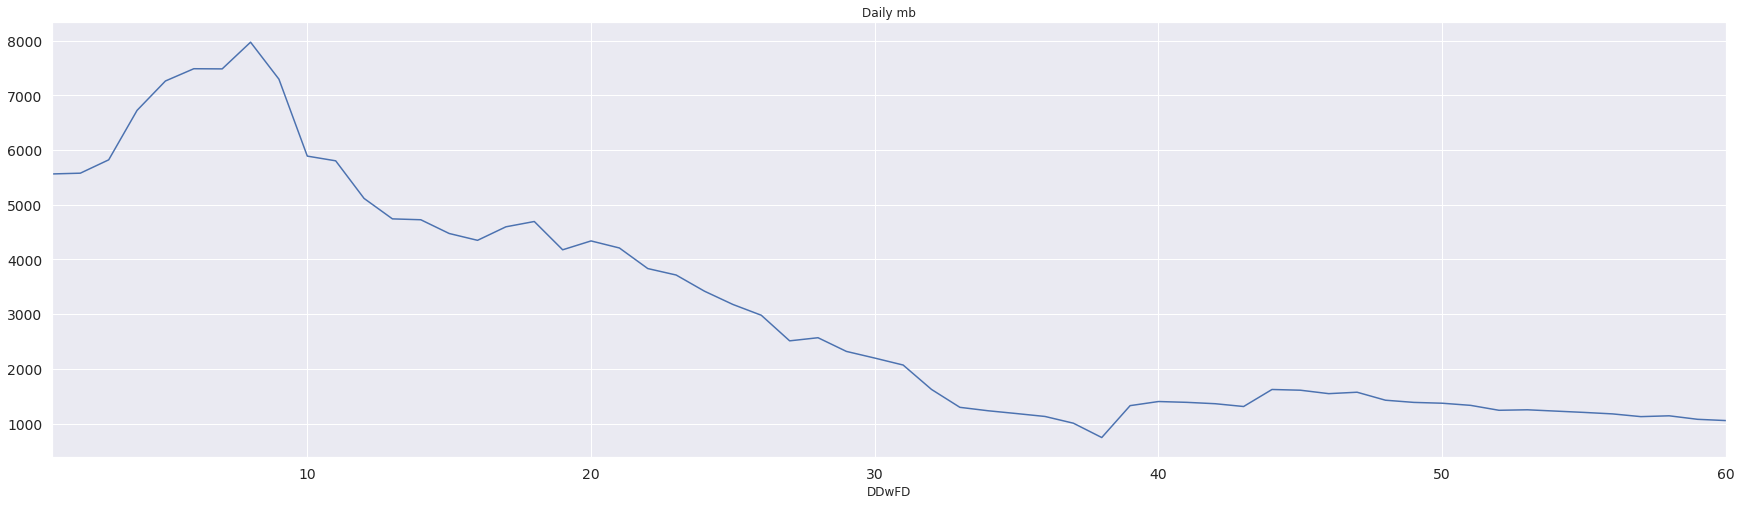

In [174]:
df_t = df_ts[['DDwFD','contractsn','mb']]
df_t['contractsn'] = df_t['contractsn'].astype(str)
df_t = df_final.groupby(by=['DDwFD']).sum()
df_t.mb.plot(figsize=(30,8), title= 'Daily mb', fontsize=14)

In [175]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [45]:
df_t = df_sum1[['DATE','contractsn','mb']]
df_t['contractsn'] = df_t['contractsn'].astype(str)
df_t.DATE = pd.to_datetime(df_t.DATE, format='%Y-%m-%d')
df_t.index = df_t.DATE
df_t = df_t.resample('D').sum()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


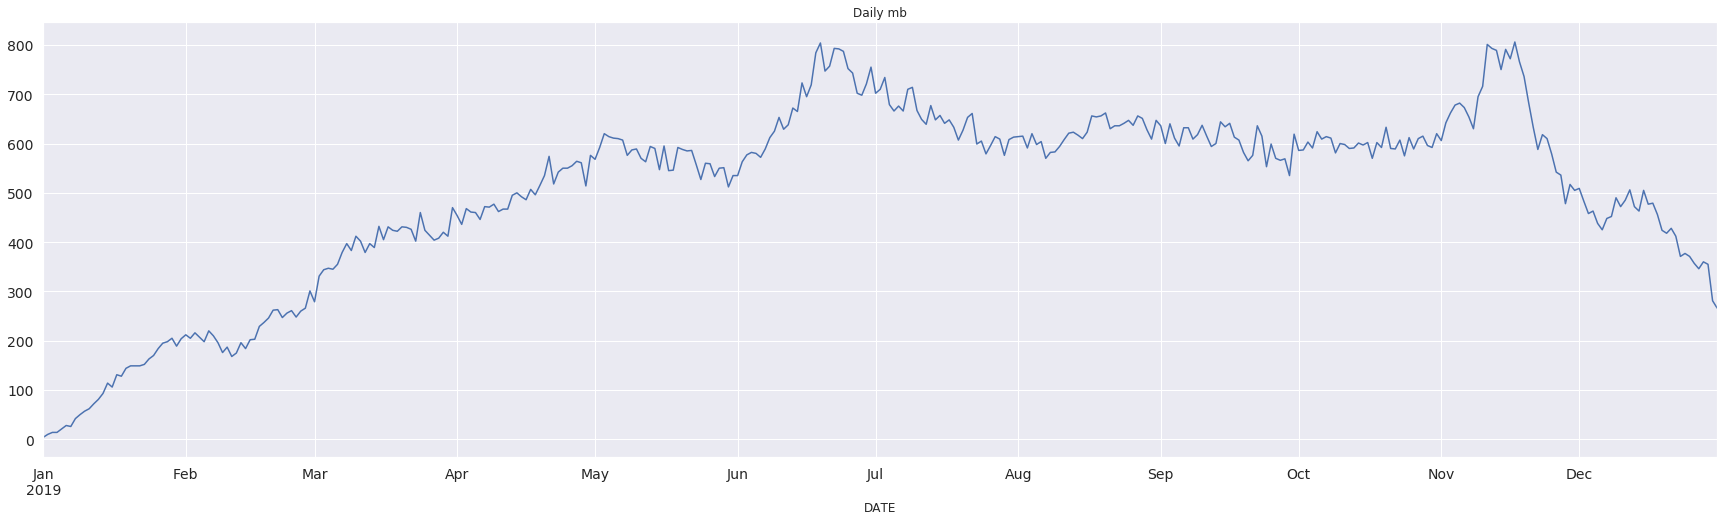

In [49]:
df_t.mb.plot(figsize=(30,8), title= 'Daily mb', fontsize=14)

In [61]:
df_t1 = df_sum1[['DDwFD','contractsn','mb']]
df_t1['contractsn'] = df_t1['contractsn'].astype(str)
df_t1 = df_t1.groupby(by=['DDwFD']).sum()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


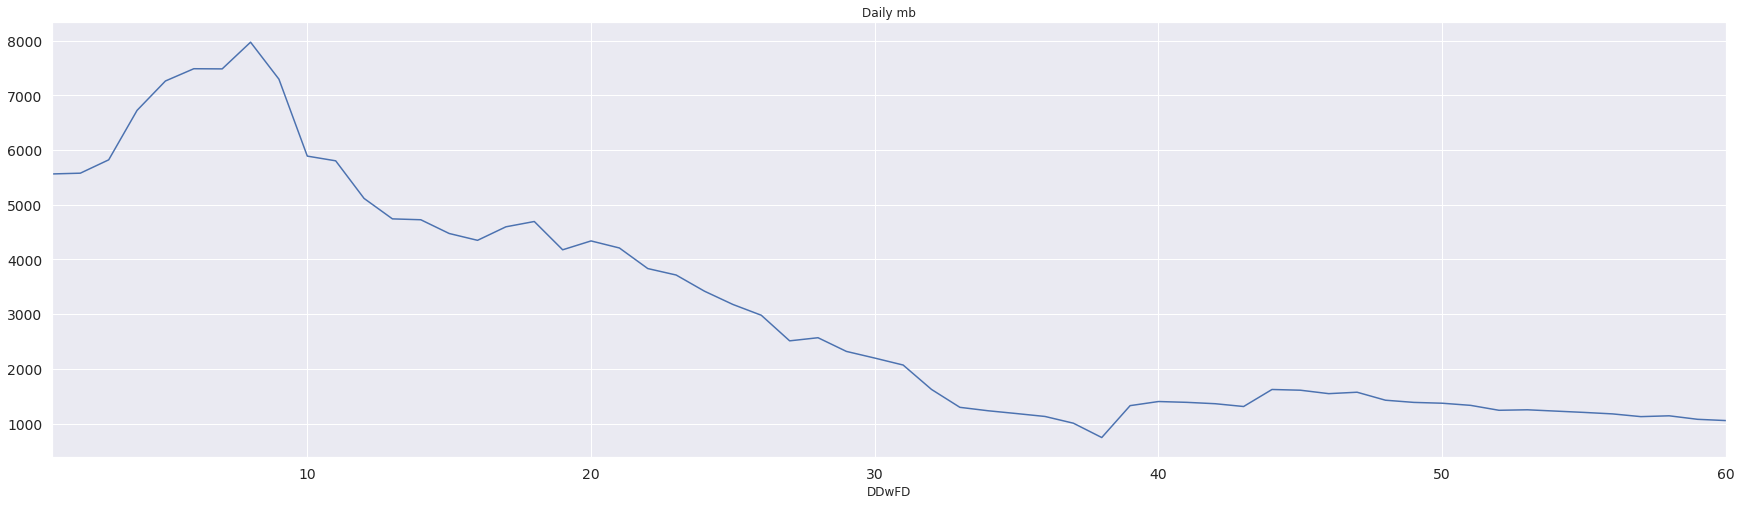

In [80]:
df_t1.mb.plot(figsize=(30,8), title= 'Daily mb', fontsize=14)

### Try

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


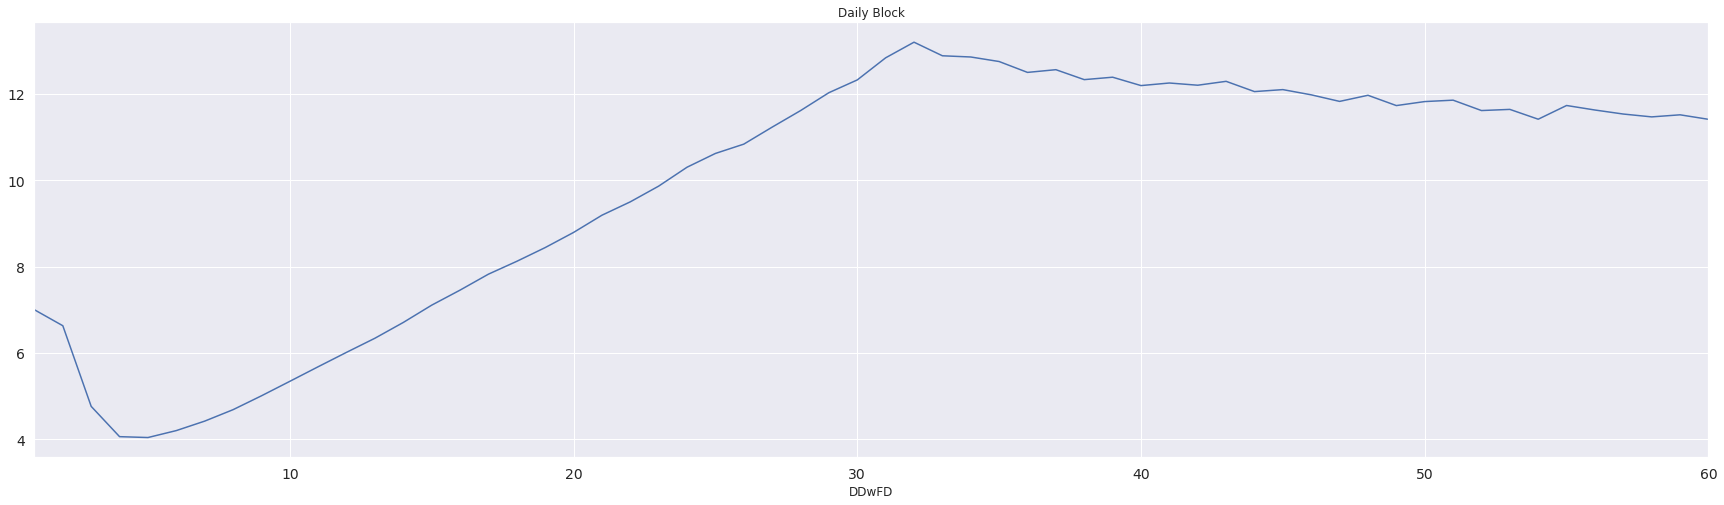

In [128]:
df_t = df_sum1[['DDwFD','contractsn','ALL_RH']]
df_t['contractsn'] = df_t['contractsn'].astype(str)
df_t = df_t.groupby(by=['DDwFD']).mean()
df_t.ALL_RH.plot(figsize=(30,8), title= 'Daily Block', fontsize=14)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


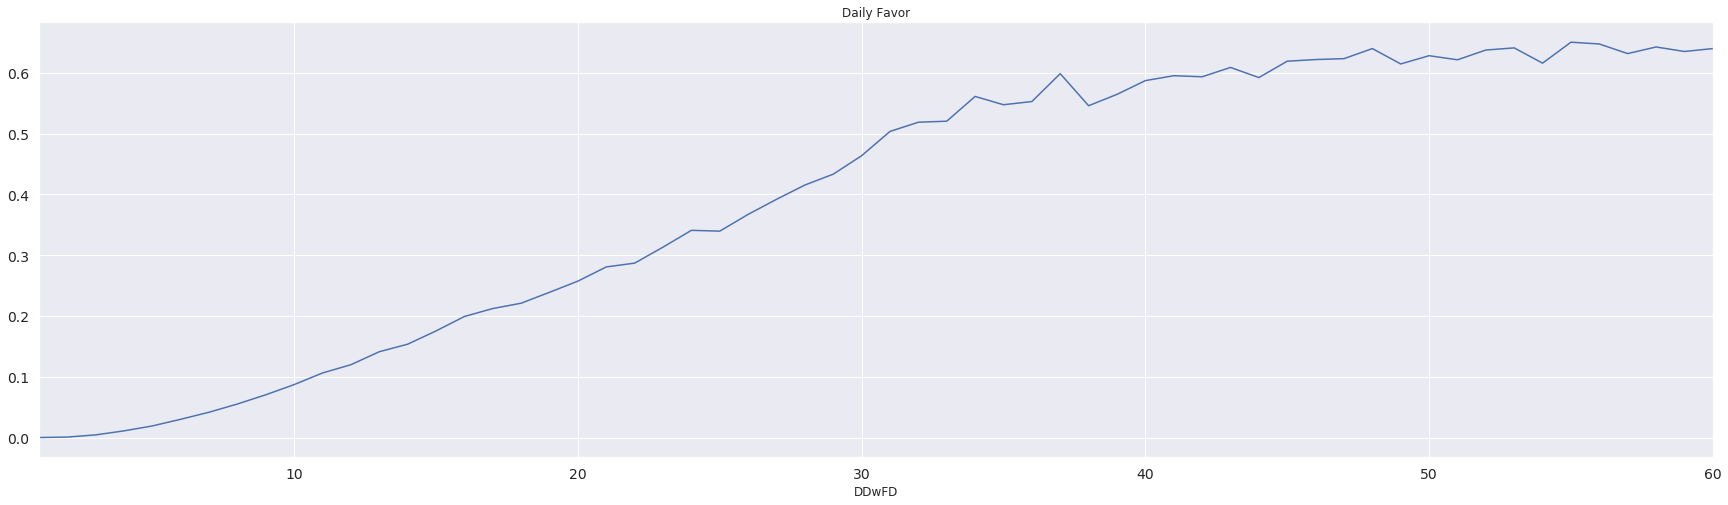

In [97]:
df_t = df_final[['DDwFD','contractsn','ALL_FavorCNT']]
df_t['contractsn'] = df_t['contractsn'].astype(str)
df_t = df_t.groupby(by=['DDwFD']).mean()
df_t.ALL_FavorCNT.plot(figsize=(30,8), title= 'Daily Favor', fontsize=14)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


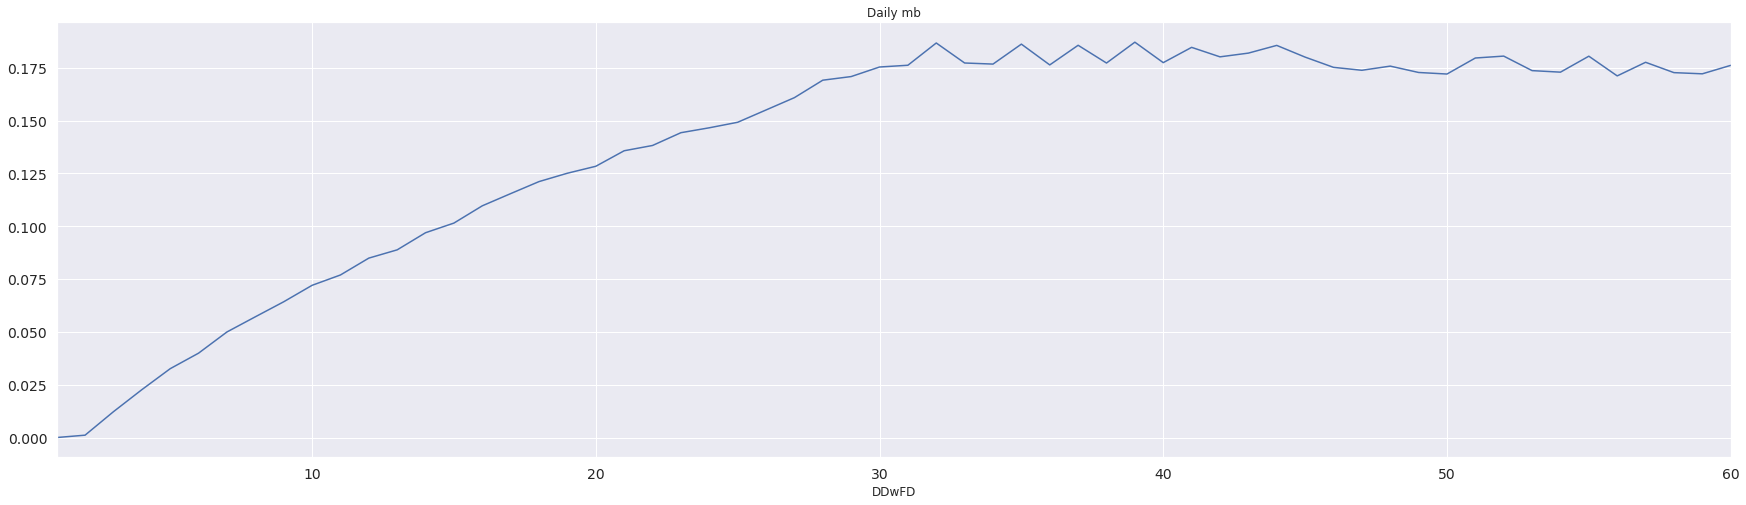

In [94]:
df_t2 = df_final[['DDwFD','contractsn','ALL_helpCNT']]
df_t2['contractsn'] = df_t2['contractsn'].astype(str)
df_t2 = df_t2.groupby(by=['DDwFD']).mean()
df_t2.ALL_helpCNT.plot(figsize=(30,8), title= 'Daily mb', fontsize=14)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


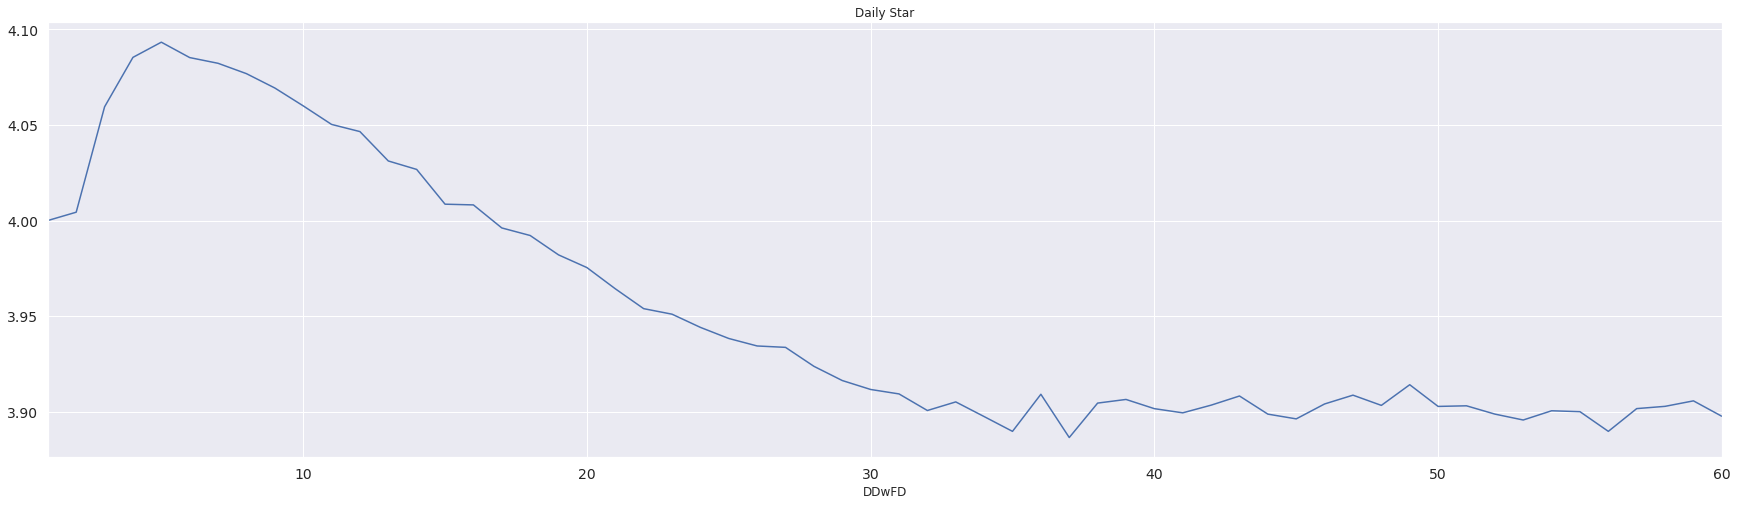

In [96]:
df_t = df_final[['DDwFD','contractsn','ALL_star']]
df_t['contractsn'] = df_t['contractsn'].astype(str)
df_t = df_t.groupby(by=['DDwFD']).mean()
df_t.ALL_star.plot(figsize=(30,8), title= 'Daily Star', fontsize=14)

## 時間欄位確認

In [6]:
from datetime import datetime as dt
import time
df_time = df[['DuringMBA','FDsellingdate','mbadate_First','mbadate_New','mbdate']]
print(df_time.info())
df_time.head(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 5 columns):
DuringMBA        1500000 non-null int64
FDsellingdate    1500000 non-null object
mbadate_First    360754 non-null object
mbadate_New      360754 non-null object
mbdate           184471 non-null object
dtypes: int64(1), object(4)
memory usage: 57.2+ MB
None


,DuringMBA,FDsellingdate,mbadate_First,mbadate_New,mbdate
0,0,2019-08-09,NaN,NaN,NaN
1,0,2019-08-08,NaN,NaN,NaN
2,0,2019-07-30,NaN,NaN,NaN
3,0,2019-07-30,NaN,NaN,NaN
4,0,2019-07-30,NaN,NaN,NaN
5,0,2019-07-30,NaN,NaN,NaN
6,0,2019-08-19,NaN,NaN,NaN
7,0,2019-08-15,NaN,NaN,NaN
8,0,2019-08-08,2019-11-05 16:59:01.297,2019-11-05 16:59:01.297,NaN
9,0,2019-08-09,2019-11-19 20:09:23.383,2019-11-19 20:09:23.383,NaN


In [111]:
'''def strTodatetime(x, format):
    return datetime.datetime.strptime(y, format)
def datet(x):
    import datetime
    import time
    y = datetime.datetime.strptime(x, "%Y-%m-%d")
    return y
def tdate(x):
    import datetime as dt
    import time
    return pd.to_datetime(x).dt.date'''

'def strTodatetime(x, format):\n    return datetime.datetime.strptime(y, format)\ndef datet(x):\n    import datetime\n    import time\n    y = datetime.datetime.strptime(x, "%Y-%m-%d")\n    return y\ndef tdate(x):\n    import datetime as dt\n    import time\n    return pd.to_datetime(x).dt.date'

In [7]:
df_time['mbadate_First']=pd.to_datetime(df_time['mbadate_First']).dt.date
df_time['mbadate_New']=pd.to_datetime(df_time['mbadate_New']).dt.date
df_time['FDsellingdate']=pd.to_datetime(df_time['FDsellingdate']).dt.date
df_time['mbdate']=pd.to_datetime(df_time['mbdate']).dt.date
df_time['mbadiff'] = df_time['mbadate_New']-df_time['mbadate_First']
df_time['mbtime'] = df_time['mbdate']-df_time['FDsellingdate']
df_time['mbaFtoSelltime'] = df_time['mbadate_First']-df_time['FDsellingdate']
df_time['mbaNtoSelltime'] = df_time['mbadate_New']-df_time['FDsellingdate']

#mbFdiff 退費與首次通報的時間差
df_time['mbFdiff'] = df_time['mbdate']-df_time['mbadate_First']

#mbNdiff 退費與最近一次通報的時間差
df_time['mbNdiff'] = df_time['mbdate']-df_time['mbadate_New']

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [8]:
df_time = df_time.fillna(0)
df_time.tail(20)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  """Entry point for launching an IPython kernel.


,DuringMBA,FDsellingdate,mbadate_First,mbadate_New,mbdate,mbadiff,mbtime,mbaFtoSelltime,mbaNtoSelltime,mbFdiff,mbNdiff
1499980,0,2019-06-18,2019-08-03,2019-08-03,2019-08-19,0 days,62 days,46 days,46 days,16 days,16 days
1499981,0,2019-06-30,2019-12-20,2019-12-20,0,0 days,0 days,173 days,173 days,0 days,0 days
1499982,0,2019-06-09,2019-06-15,2019-06-15,0,0 days,0 days,6 days,6 days,0 days,0 days
1499983,0,2019-06-09,0,0,0,0 days,0 days,0 days,0 days,0 days,0 days
1499984,0,2019-06-18,0,0,0,0 days,0 days,0 days,0 days,0 days,0 days
1499985,0,2019-06-11,0,0,0,0 days,0 days,0 days,0 days,0 days,0 days
1499986,0,2019-06-12,0,0,0,0 days,0 days,0 days,0 days,0 days,0 days
1499987,0,2019-06-12,0,0,0,0 days,0 days,0 days,0 days,0 days,0 days
1499988,0,2019-06-18,2019-07-21,2019-07-21,0,0 days,0 days,33 days,33 days,0 days,0 days
1499989,0,2019-06-14,0,0,0,0 days,0 days,0 days,0 days,0 days,0 days


## 確認單一值

發現testdata.csv有誤(過多欄位單一值)
討論過後, Kise Debug SQL script

load new SQL script

In [10]:
L11=[]
L22=list(df.isnull().sum()/len(df))
for i in df:
    #print('column name','kinds counts')
    L11.append((i,len(df[str(i)].value_counts())))
print('-'*10,'Item','-'*10)
df0 = pd.DataFrame(L11,columns=['column_name','species_counts'])
print(df0[df0['species_counts']==1])
print('-'*10,'value_counts','-'*10)
for i in df0['column_name'][df0['species_counts']==1]:
    print(df[str(i)].value_counts())

---------- Item ----------
        column_name  species_counts
435  WarrantyPeriod               1
---------- value_counts ----------
7    1500000
Name: WarrantyPeriod, dtype: int64


In [11]:
dff_all = df[['DDwFD', 'DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nconcompli', 'nmatcompla',
       'nmatcompli', 'nteccompla', 'accLIKE', 'proLIKE', 'accDLIKE',
       'proDLIKE', 'FavorCNT', 'BlockCNT', 'AddFavorCNT', 'AddBlockCNT',
       'star', 'isIntCNT', 'LVdiffCNT', 'MGMLead', 'MGMRes', 'MGMDemo',
       'MGMDeal', 'conUUCCNT', 'conSOUCNT', 'conSERCNT', 'conTWBCNT',
       'conOTHCNT', 'conLigCNT', 'conMedCNT', 'conTanCNT', 'conDarCNT',
       'conEx01CNT', 'conEx03CNT', 'conEx12CNT', 'conEx24CNT', 'conage30CNT',
       'conage40CNT', 'conage50CNT', 'conage60CNT', 'conage61CNT', 'conMCNT',
       'conFCNT', 'helpCNT', 'helpCNTmax', 'help3mCNT', 'help3mCNTmax',
       'helpITCNT', 'helpITCNTmax', 'helpIT3mCNT', 'helpIT3mCNTmax',
       'helpIiCNT', 'helpIiCNTmax', 'helpIi3mCNT', 'helpIi3mCNTmax',
       'helpMaCNT', 'helpMaCNTmax', 'helpMa3mCNT', 'helpMa3mCNTmax',
       'helpTeCNT', 'helpTeCNTmax', 'helpTe3mCNT', 'helpTe3mCNTmax',
       'helpconCNT', 'helpconCNTmax', 'helpcon3mCNT', 'helpcon3mCNTmax',
       'ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR',
       'ALL_nTR', 'ALL_nconcompla', 'ALL_nconcompli', 'ALL_nmatcompla',
       'ALL_nmatcompli', 'ALL_nteccompla', 'ALL_accLIKE', 'ALL_proLIKE',
       'ALL_accDLIKE', 'ALL_proDLIKE', 'ALL_FavorCNT', 'ALL_BlockCNT',
       'ALL_AddFavorCNT', 'ALL_AddBlockCNT', 'ALL_star', 'ALL_isIntCNT',
       'ALL_LVdiffCNT', 'ALL_MGMLead', 'ALL_MGMRes', 'ALL_MGMDemo',
       'ALL_MGMDeal', 'ALL_conUUCCNT', 'ALL_conSOUCNT', 'ALL_conSERCNT',
       'ALL_conTWBCNT', 'ALL_conOTHCNT', 'ALL_conLigCNT', 'ALL_conMedCNT',
       'ALL_conTanCNT', 'ALL_conDarCNT', 'ALL_conEx01CNT', 'ALL_conEx03CNT',
       'ALL_conEx12CNT', 'ALL_conEx24CNT', 'ALL_conage30CNT',
       'ALL_conage40CNT', 'ALL_conage50CNT', 'ALL_conage60CNT',
       'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT', 'ALL_helpCNT',
       'ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax', 'ALL_helpITCNT',
       'ALL_helpITCNTmax', 'ALL_helpIT3mCNT', 'ALL_helpIT3mCNTmax',
       'ALL_helpIiCNT', 'ALL_helpIiCNTmax', 'ALL_helpIi3mCNT',
       'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT', 'ALL_helpMaCNTmax',
       'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax', 'ALL_helpTeCNT',
       'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT', 'ALL_helpTe3mCNTmax',
       'ALL_helpconCNT', 'ALL_helpconCNTmax', 'ALL_helpcon3mCNT',
       'ALL_helpcon3mCNTmax', 'L1D_RH', 'L1D_AH', 'L1D_re', 'L1D_fbCNT',
       'L1D_nCR', 'L1D_nMR', 'L1D_nTR', 'L1D_nconcompla', 'L1D_nconcompli',
       'L1D_nmatcompla', 'L1D_nmatcompli', 'L1D_nteccompla', 'L1D_accLIKE',
       'L1D_proLIKE', 'L1D_accDLIKE', 'L1D_proDLIKE', 'L1D_FavorCNT',
       'L1D_BlockCNT', 'L1D_AddFavorCNT', 'L1D_AddBlockCNT', 'L1D_star',
       'L1D_isIntCNT', 'L1D_LVdiffCNT', 'L1D_MGMLead', 'L1D_MGMRes',
       'L1D_MGMDemo', 'L1D_MGMDeal', 'L1D_conUUCCNT', 'L1D_conSOUCNT',
       'L1D_conSERCNT', 'L1D_conTWBCNT', 'L1D_conOTHCNT', 'L1D_conLigCNT',
       'L1D_conMedCNT', 'L1D_conTanCNT', 'L1D_conDarCNT', 'L1D_conEx01CNT',
       'L1D_conEx03CNT', 'L1D_conEx12CNT', 'L1D_conEx24CNT', 'L1D_conage30CNT',
       'L1D_conage40CNT', 'L1D_conage50CNT', 'L1D_conage60CNT',
       'L1D_conage61CNT', 'L1D_conMCNT', 'L1D_conFCNT', 'L1D_helpCNT',
       'L1D_helpCNTmax', 'L1D_help3mCNT', 'L1D_help3mCNTmax', 'L1D_helpITCNT',
       'L1D_helpITCNTmax', 'L1D_helpIT3mCNT', 'L1D_helpIT3mCNTmax',
       'L1D_helpIiCNT', 'L1D_helpIiCNTmax', 'L1D_helpIi3mCNT',
       'L1D_helpIi3mCNTmax', 'L1D_helpMaCNT', 'L1D_helpMaCNTmax',
       'L1D_helpMa3mCNT', 'L1D_helpMa3mCNTmax', 'L1D_helpTeCNT',
       'L1D_helpTeCNTmax', 'L1D_helpTe3mCNT', 'L1D_helpTe3mCNTmax',
       'L1D_helpconCNT', 'L1D_helpconCNTmax', 'L1D_helpcon3mCNT',
       'L1D_helpcon3mCNTmax','FDsellingdate',
       'product_sdate', 'mb', 'mb_STV', 'mbdate', 'WarrantyPeriod', 'mbaCNT',
       'mbadate_First', 'mbadate_New', 'MBA_technical', 'MBA_customer',
       'MBA_Scheduling', 'MBA_Class', 'MBA_Service']]

MBA系列遺失值填補(MBA Nan代表未通報 補0)

In [12]:
dff_all['MBA_technical'] = dff_all['MBA_technical'].fillna(0)
dff_all['MBA_customer'] = dff_all['MBA_customer'].fillna(0)
dff_all['MBA_Scheduling'] = dff_all['MBA_Scheduling'].fillna(0)
dff_all['MBA_Class'] = dff_all['MBA_Class'].fillna(0)
dff_all['MBA_Service'] = dff_all['MBA_Service'].fillna(0)
dff_all['MBA_total']=dff_all['MBA_Class']+dff_all['MBA_Scheduling']+dff_all['MBA_Service']+dff_all['MBA_customer']+dff_all['MBA_technical']

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [13]:
dff_all['mbadate_First']=pd.to_datetime(dff_all['mbadate_First']).dt.date
dff_all['mbadate_New']=pd.to_datetime(dff_all['mbadate_New']).dt.date
dff_all['FDsellingdate']=pd.to_datetime(dff_all['FDsellingdate']).dt.date
dff_all['mbdate']=pd.to_datetime(dff_all['mbdate']).dt.date
dff_all['mbadiff'] = dff_all['mbadate_New']-dff_all['mbadate_First']
dff_all['mbtime'] = dff_all['mbdate']-dff_all['FDsellingdate']
dff_all['mbaFtoSelltime'] = dff_all['mbadate_First']-dff_all['FDsellingdate']
dff_all['mbaNtoSelltime'] = dff_all['mbadate_New']-dff_all['FDsellingdate']
dff_all['mbFdiff'] = dff_all['mbdate']-dff_all['mbadate_First']
dff_all['mbNdiff'] = dff_all['mbdate']-dff_all['mbadate_New']

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

刪除不必要欄位

In [14]:
dff_all = dff_all.drop(['MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service'],axis=1)
dff_all = dff_all.drop(['ALL_nconcompli','ALL_nmatcompli'],axis=1)
dff_all = dff_all.drop(['mbadate_First','mbadate_New','FDsellingdate','mbdate',],axis=1)
dff_all = dff_all.drop(['WarrantyPeriod'],axis=1)

In [15]:
dff_all = dff_all.drop(['product_sdate'],axis=1)

其他遺失值補0
新資料集為dff_test

In [16]:
dff_test = dff_all.fillna(0)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  """Entry point for launching an IPython kernel.


In [26]:
dff_test.head(30)

,DDwFD,DuringMBA,RH,AH,re,fbCNT,nCR,nMR,nTR,nconcompla,nconcompli,nmatcompla,nmatcompli,nteccompla,accLIKE,proLIKE,accDLIKE,proDLIKE,FavorCNT,BlockCNT,AddFavorCNT,AddBlockCNT,star,isIntCNT,LVdiffCNT,MGMLead,MGMRes,MGMDemo,MGMDeal,conUUCCNT,conSOUCNT,conSERCNT,conTWBCNT,conOTHCNT,conLigCNT,conMedCNT,conTanCNT,conDarCNT,conEx01CNT,conEx03CNT,conEx12CNT,conEx24CNT,conage30CNT,conage40CNT,conage50CNT,conage60CNT,conage61CNT,conMCNT,conFCNT,helpCNT,helpCNTmax,help3mCNT,help3mCNTmax,helpITCNT,helpITCNTmax,helpIT3mCNT,helpIT3mCNTmax,helpIiCNT,helpIiCNTmax,helpIi3mCNT,helpIi3mCNTmax,helpMaCNT,helpMaCNTmax,helpMa3mCNT,helpMa3mCNTmax,helpTeCNT,helpTeCNTmax,helpTe3mCNT,helpTe3mCNTmax,helpconCNT,helpconCNTmax,helpcon3mCNT,helpcon3mCNTmax,ALL_RH,ALL_AH,ALL_re,ALL_fbCNT,ALL_nCR,ALL_nMR,ALL_nTR,ALL_nconcompla,ALL_nmatcompla,ALL_nteccompla,ALL_accLIKE,ALL_proLIKE,ALL_accDLIKE,ALL_proDLIKE,ALL_FavorCNT,ALL_BlockCNT,ALL_AddFavorCNT,ALL_AddBlockCNT,ALL_star,ALL_isIntCNT,ALL_LVdiffCNT,ALL_MGMLead,ALL_MGMRes,ALL_MGMDemo,ALL_MGMDeal,ALL_conUUCCNT,ALL_conSOUCNT,ALL_conSERCNT,ALL_conTWBCNT,ALL_conOTHCNT,ALL_conLigCNT,ALL_conMedCNT,ALL_conTanCNT,ALL_conDarCNT,ALL_conEx01CNT,ALL_conEx03CNT,ALL_conEx12CNT,ALL_conEx24CNT,ALL_conage30CNT,ALL_conage40CNT,ALL_conage50CNT,ALL_conage60CNT,ALL_conage61CNT,ALL_conMCNT,ALL_conFCNT,ALL_helpCNT,ALL_helpCNTmax,ALL_help3mCNT,ALL_help3mCNTmax,ALL_helpITCNT,ALL_helpITCNTmax,ALL_helpIT3mCNT,ALL_helpIT3mCNTmax,ALL_helpIiCNT,ALL_helpIiCNTmax,ALL_helpIi3mCNT,ALL_helpIi3mCNTmax,ALL_helpMaCNT,ALL_helpMaCNTmax,ALL_helpMa3mCNT,ALL_helpMa3mCNTmax,ALL_helpTeCNT,ALL_helpTeCNTmax,ALL_helpTe3mCNT,ALL_helpTe3mCNTmax,ALL_helpconCNT,ALL_helpconCNTmax,ALL_helpcon3mCNT,ALL_helpcon3mCNTmax,L1D_RH,L1D_AH,L1D_re,L1D_fbCNT,L1D_nCR,L1D_nMR,L1D_nTR,L1D_nconcompla,L1D_nconcompli,L1D_nmatcompla,L1D_nmatcompli,L1D_nteccompla,L1D_accLIKE,L1D_proLIKE,L1D_accDLIKE,L1D_proDLIKE,L1D_FavorCNT,L1D_BlockCNT,L1D_AddFavorCNT,L1D_AddBlockCNT,L1D_star,L1D_isIntCNT,L1D_LVdiffCNT,L1D_MGMLead,L1D_MGMRes,L1D_MGMDemo,L1D_MGMDeal,L1D_conUUCCNT,L1D_conSOUCNT,L1D_conSERCNT,L1D_conTWBCNT,L1D_conOTHCNT,L1D_conLigCNT,L1D_conMedCNT,L1D_conTanCNT,L1D_conDarCNT,L1D_conEx01CNT,L1D_conEx03CNT,L1D_conEx12CNT,L1D_conEx24CNT,L1D_conage30CNT,L1D_conage40CNT,L1D_conage50CNT,L1D_conage60CNT,L1D_conage61CNT,L1D_conMCNT,L1D_conFCNT,L1D_helpCNT,L1D_helpCNTmax,L1D_help3mCNT,L1D_help3mCNTmax,L1D_helpITCNT,L1D_helpITCNTmax,L1D_helpIT3mCNT,L1D_helpIT3mCNTmax,L1D_helpIiCNT,L1D_helpIiCNTmax,L1D_helpIi3mCNT,L1D_helpIi3mCNTmax,L1D_helpMaCNT,L1D_helpMaCNTmax,L1D_helpMa3mCNT,L1D_helpMa3mCNTmax,L1D_helpTeCNT,L1D_helpTeCNTmax,L1D_helpTe3mCNT,L1D_helpTe3mCNTmax,L1D_helpconCNT,L1D_helpconCNTmax,L1D_helpcon3mCNT,L1D_helpcon3mCNTmax,mb,mb_STV,mbaCNT,MBA_total,mbadiff,mbtime,mbaFtoSelltime,mbaNtoSelltime,mbFdiff,mbNdiff
0,43,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,7.0,9.714285,9.714285,9.571428,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,4.0,7.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,4.0,0.0,3.0,2.0,2.0,1.0,0.0,2.0,1.0,1.0,4.0,0.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.500000,4.0,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0 days,0 days,0 days,0 days,0 days,0 days
1,43,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [18]:
dff_test.columns

Index(['DDwFD', 'DuringMBA', 'RH', 'AH', 're', 'fbCNT', 'nCR', 'nMR', 'nTR',
       'nconcompla', 'nconcompli', 'nmatcompla', 'nmatcompli', 'nteccompla',
       'accLIKE', 'proLIKE', 'accDLIKE', 'proDLIKE', 'FavorCNT', 'BlockCNT',
       'AddFavorCNT', 'AddBlockCNT', 'star', 'isIntCNT', 'LVdiffCNT',
       'MGMLead', 'MGMRes', 'MGMDemo', 'MGMDeal', 'conUUCCNT', 'conSOUCNT',
       'conSERCNT', 'conTWBCNT', 'conOTHCNT', 'conLigCNT', 'conMedCNT',
       'conTanCNT', 'conDarCNT', 'conEx01CNT', 'conEx03CNT', 'conEx12CNT',
       'conEx24CNT', 'conage30CNT', 'conage40CNT', 'conage50CNT',
       'conage60CNT', 'conage61CNT', 'conMCNT', 'conFCNT', 'helpCNT',
       'helpCNTmax', 'help3mCNT', 'help3mCNTmax', 'helpITCNT', 'helpITCNTmax',
       'helpIT3mCNT', 'helpIT3mCNTmax', 'helpIiCNT', 'helpIiCNTmax',
       'helpIi3mCNT', 'helpIi3mCNTmax', 'helpMaCNT', 'helpMaCNTmax',
       'helpMa3mCNT', 'helpMa3mCNTmax', 'helpTeCNT', 'helpTeCNTmax',
       'helpTe3mCNT', 'helpTe3mCNTmax', 'helpconCNT', 

In [37]:
L11=[]
L22=list(dff_test.isnull().sum()/len(dff_test))
for i in dff_test:
    #print('column name','kinds counts')
    L11.append((i,len(dff_test[str(i)].value_counts())))
print('-'*10,'Item','-'*10)
df0 = pd.DataFrame(L11,columns=['column_name','species_counts'])
print(df0[df0['species_counts']==1])
print('-'*10,'value_counts','-'*10)
for i in df0['column_name'][df0['species_counts']==1]:
    print(dff_test[str(i)].value_counts())

---------- Item ----------
Empty DataFrame
Columns: [column_name, species_counts]
Index: []
---------- value_counts ----------


In [19]:
namess=['L1D_RH', 'L1D_AH', 'L1D_re',
       'L1D_fbCNT', 'L1D_nCR', 'L1D_nMR', 'L1D_nTR', 'L1D_nconcompla',
       'L1D_nconcompli', 'L1D_nmatcompla', 'L1D_nmatcompli', 'L1D_nteccompla',
       'L1D_accLIKE', 'L1D_proLIKE', 'L1D_accDLIKE', 'L1D_proDLIKE',
       'L1D_FavorCNT', 'L1D_BlockCNT', 'L1D_AddFavorCNT', 'L1D_AddBlockCNT',
       'L1D_star', 'L1D_isIntCNT', 'L1D_LVdiffCNT', 'L1D_MGMLead',
       'L1D_MGMRes', 'L1D_MGMDemo', 'L1D_MGMDeal', 'L1D_conUUCCNT',
       'L1D_conSOUCNT', 'L1D_conSERCNT', 'L1D_conTWBCNT', 'L1D_conOTHCNT',
       'L1D_conLigCNT', 'L1D_conMedCNT', 'L1D_conTanCNT', 'L1D_conDarCNT',
       'L1D_conEx01CNT', 'L1D_conEx03CNT', 'L1D_conEx12CNT', 'L1D_conEx24CNT',
       'L1D_conage30CNT', 'L1D_conage40CNT', 'L1D_conage50CNT',
       'L1D_conage60CNT', 'L1D_conage61CNT', 'L1D_conMCNT', 'L1D_conFCNT',
       'L1D_helpCNT', 'L1D_helpCNTmax', 'L1D_help3mCNT', 'L1D_help3mCNTmax',
       'L1D_helpITCNT', 'L1D_helpITCNTmax', 'L1D_helpIT3mCNT',
       'L1D_helpIT3mCNTmax', 'L1D_helpIiCNT', 'L1D_helpIiCNTmax',
       'L1D_helpIi3mCNT', 'L1D_helpIi3mCNTmax', 'L1D_helpMaCNT',
       'L1D_helpMaCNTmax', 'L1D_helpMa3mCNT', 'L1D_helpMa3mCNTmax',
       'L1D_helpTeCNT', 'L1D_helpTeCNTmax', 'L1D_helpTe3mCNT',
       'L1D_helpTe3mCNTmax', 'L1D_helpconCNT', 'L1D_helpconCNTmax',
       'L1D_helpcon3mCNT', 'L1D_helpcon3mCNTmax']

## heatmap 和 barmap 確認corelation coefficient
## 故先把時間欄位去掉
## 去掉的包含:'DDwFD', 'contractsn', 'DATE','FDsellingdate','product_sdate','mbadate_First', 'mbadate_New',

In [10]:
dff_plt = dff_test[['DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nconcompli', 'nmatcompla',
       'nmatcompli', 'nteccompla', 'accLIKE', 'proLIKE', 'accDLIKE',
       'proDLIKE', 'FavorCNT', 'BlockCNT', 'AddFavorCNT', 'AddBlockCNT',
       'star', 'isIntCNT', 'LVdiffCNT', 'MGMLead', 'MGMRes', 'MGMDemo',
       'MGMDeal', 'conUUCCNT', 'conSOUCNT', 'conSERCNT', 'conTWBCNT',
       'conOTHCNT', 'conLigCNT', 'conMedCNT', 'conTanCNT', 'conDarCNT',
       'conEx01CNT', 'conEx03CNT', 'conEx12CNT', 'conEx24CNT', 'conage30CNT',
       'conage40CNT', 'conage50CNT', 'conage60CNT', 'conage61CNT', 'conMCNT',
       'conFCNT', 'helpCNT', 'helpCNTmax', 'help3mCNT', 'help3mCNTmax',
       'helpITCNT', 'helpITCNTmax', 'helpIT3mCNT', 'helpIT3mCNTmax',
       'helpIiCNT', 'helpIiCNTmax', 'helpIi3mCNT', 'helpIi3mCNTmax',
       'helpMaCNT', 'helpMaCNTmax', 'helpMa3mCNT', 'helpMa3mCNTmax',
       'helpTeCNT', 'helpTeCNTmax', 'helpTe3mCNT', 'helpTe3mCNTmax',
       'helpconCNT', 'helpconCNTmax', 'helpcon3mCNT', 'helpcon3mCNTmax',
       'ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR',
       'ALL_nTR', 'ALL_nconcompla', 'ALL_nmatcompla', 'ALL_nteccompla',
       'ALL_accLIKE', 'ALL_proLIKE', 'ALL_accDLIKE', 'ALL_proDLIKE',
       'ALL_FavorCNT', 'ALL_BlockCNT', 'ALL_AddFavorCNT', 'ALL_AddBlockCNT',
       'ALL_star', 'ALL_isIntCNT', 'ALL_LVdiffCNT', 'ALL_MGMLead',
       'ALL_MGMRes', 'ALL_MGMDemo', 'ALL_MGMDeal', 'ALL_conUUCCNT',
       'ALL_conSOUCNT', 'ALL_conSERCNT', 'ALL_conTWBCNT', 'ALL_conOTHCNT',
       'ALL_conLigCNT', 'ALL_conMedCNT', 'ALL_conTanCNT', 'ALL_conDarCNT',
       'ALL_conEx01CNT', 'ALL_conEx03CNT', 'ALL_conEx12CNT', 'ALL_conEx24CNT',
       'ALL_conage30CNT', 'ALL_conage40CNT', 'ALL_conage50CNT',
       'ALL_conage60CNT', 'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT',
       'ALL_helpCNT', 'ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax',
       'ALL_helpITCNT', 'ALL_helpITCNTmax', 'ALL_helpIT3mCNT',
       'ALL_helpIT3mCNTmax', 'ALL_helpIiCNT', 'ALL_helpIiCNTmax',
       'ALL_helpIi3mCNT', 'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT',
       'ALL_helpMaCNTmax', 'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax',
       'ALL_helpTeCNT', 'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT',
       'ALL_helpTe3mCNTmax', 'ALL_helpconCNT', 'ALL_helpconCNTmax',
       'ALL_helpcon3mCNT', 'ALL_helpcon3mCNTmax',  
       'mb', 'mb_STV',  'mbaCNT', 'MBA_total']]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


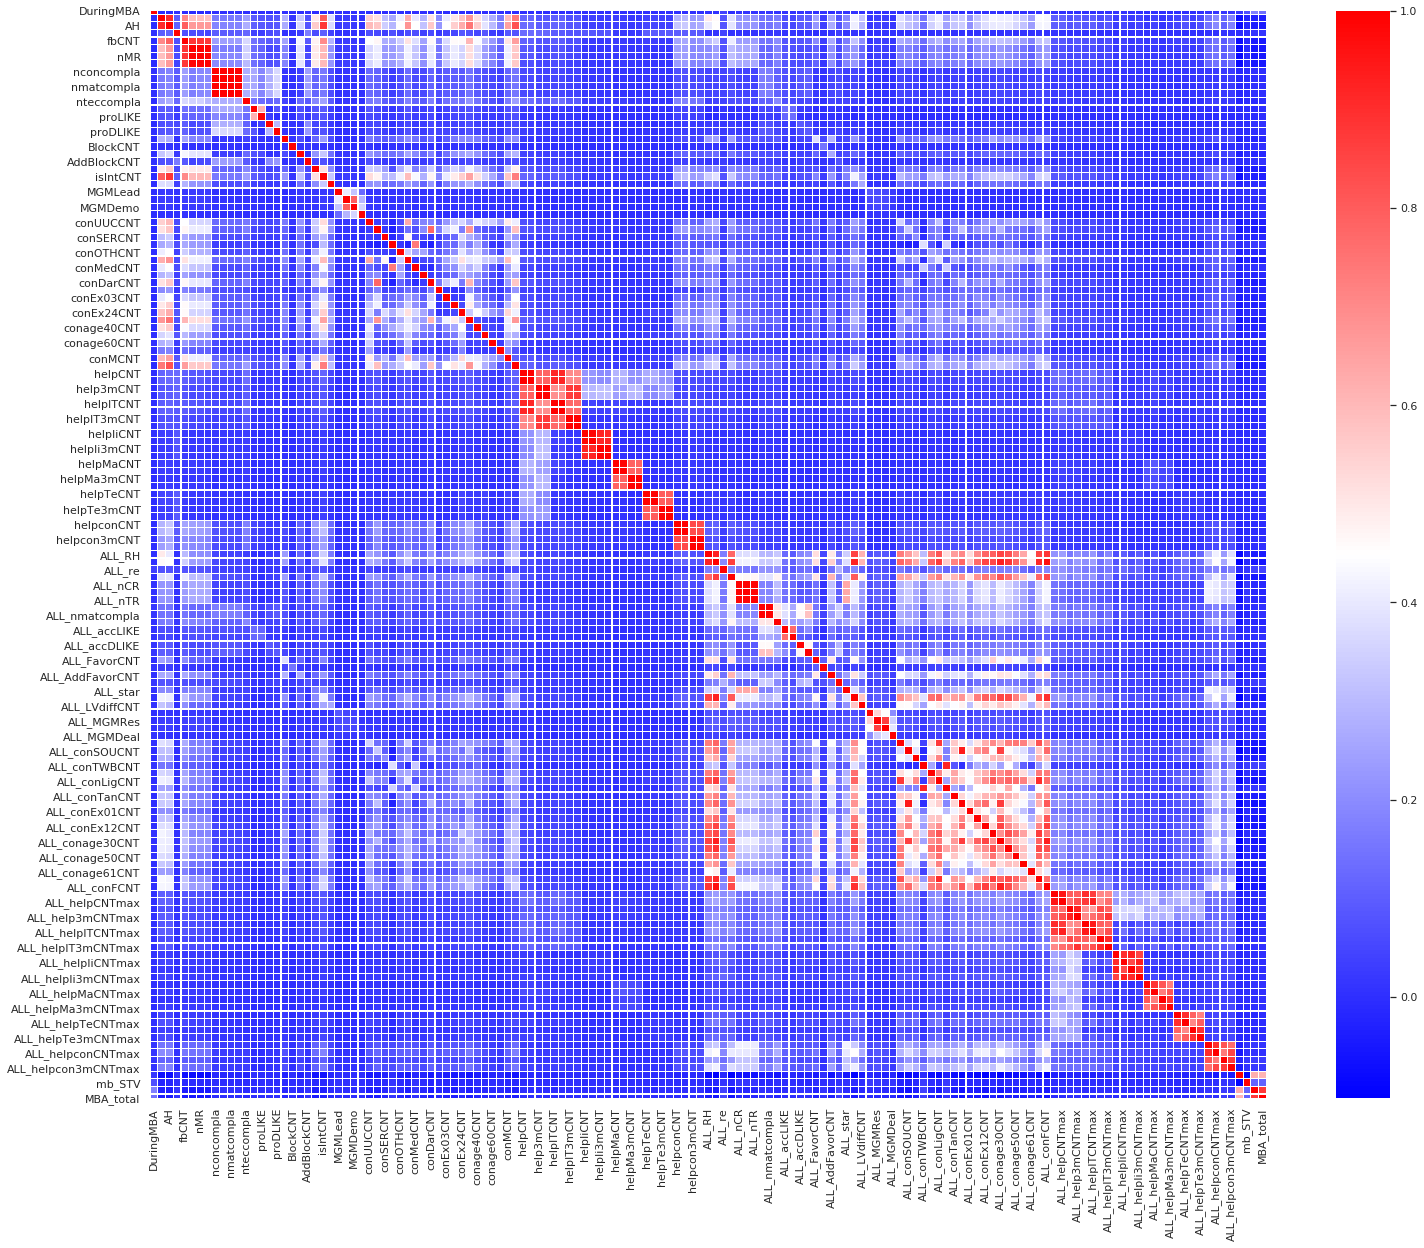

In [11]:
plt.figure(figsize=(25,20))
sns.heatmap(dff_plt.astype(float).corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white')

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for mb')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


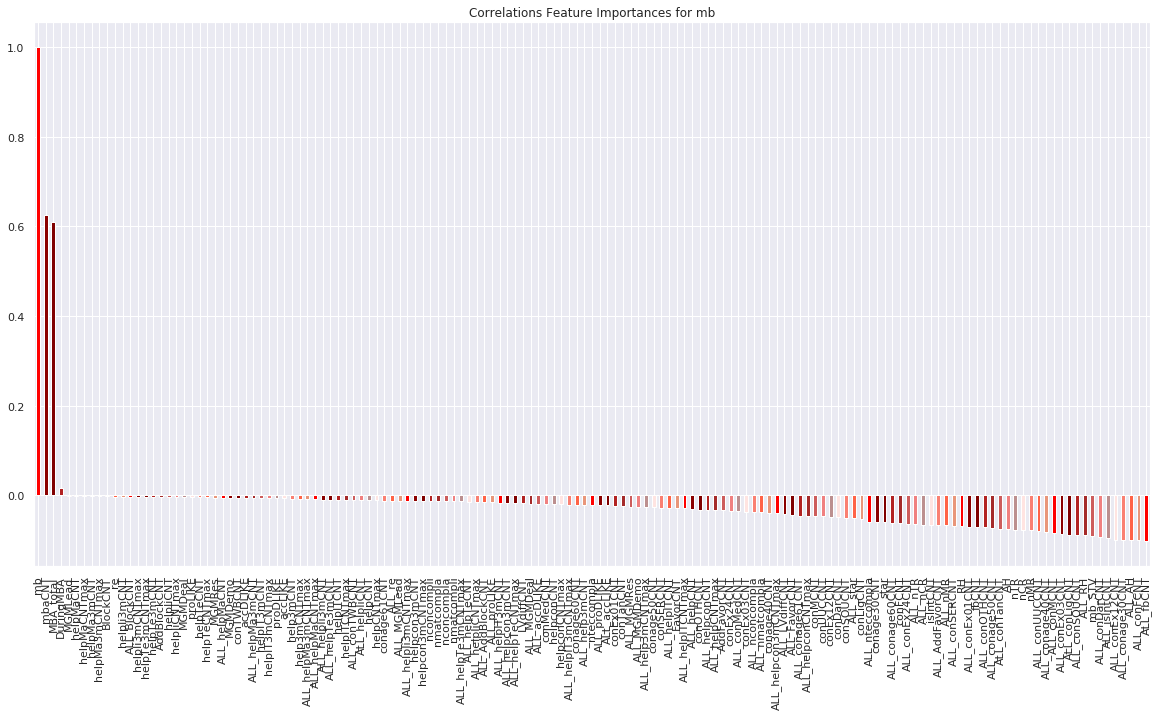

In [12]:
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']


plt.figure(figsize=(20,10))
dff_plt.corr()['mb'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

In [15]:
dff_test.shape

(1500000, 224)

In [14]:
dff_plt.shape

(1500000, 145)

## 針對ALL系列

In [16]:
dff_plt1 = dff_test[['DuringMBA', 
       'ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR',
       'ALL_nTR', 'ALL_nconcompla', 'ALL_nmatcompla', 'ALL_nteccompla',
       'ALL_accLIKE', 'ALL_proLIKE', 'ALL_accDLIKE', 'ALL_proDLIKE',
       'ALL_FavorCNT', 'ALL_BlockCNT', 'ALL_AddFavorCNT', 'ALL_AddBlockCNT',
       'ALL_star', 'ALL_isIntCNT', 'ALL_LVdiffCNT', 'ALL_MGMLead',
       'ALL_MGMRes', 'ALL_MGMDemo', 'ALL_MGMDeal', 'ALL_conUUCCNT',
       'ALL_conSOUCNT', 'ALL_conSERCNT', 'ALL_conTWBCNT', 'ALL_conOTHCNT',
       'ALL_conLigCNT', 'ALL_conMedCNT', 'ALL_conTanCNT', 'ALL_conDarCNT',
       'ALL_conEx01CNT', 'ALL_conEx03CNT', 'ALL_conEx12CNT', 'ALL_conEx24CNT',
       'ALL_conage30CNT', 'ALL_conage40CNT', 'ALL_conage50CNT',
       'ALL_conage60CNT', 'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT',
       'ALL_helpCNT', 'ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax',
       'ALL_helpITCNT', 'ALL_helpITCNTmax', 'ALL_helpIT3mCNT',
       'ALL_helpIT3mCNTmax', 'ALL_helpIiCNT', 'ALL_helpIiCNTmax',
       'ALL_helpIi3mCNT', 'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT',
       'ALL_helpMaCNTmax', 'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax',
       'ALL_helpTeCNT', 'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT',
       'ALL_helpTe3mCNTmax', 'ALL_helpconCNT', 'ALL_helpconCNTmax',
       'ALL_helpcon3mCNT', 'ALL_helpcon3mCNTmax',  
       'mb', 'mb_STV',  'mbaCNT', 'MBA_total']]

In [17]:
dff_plt1.shape

(1500000, 74)

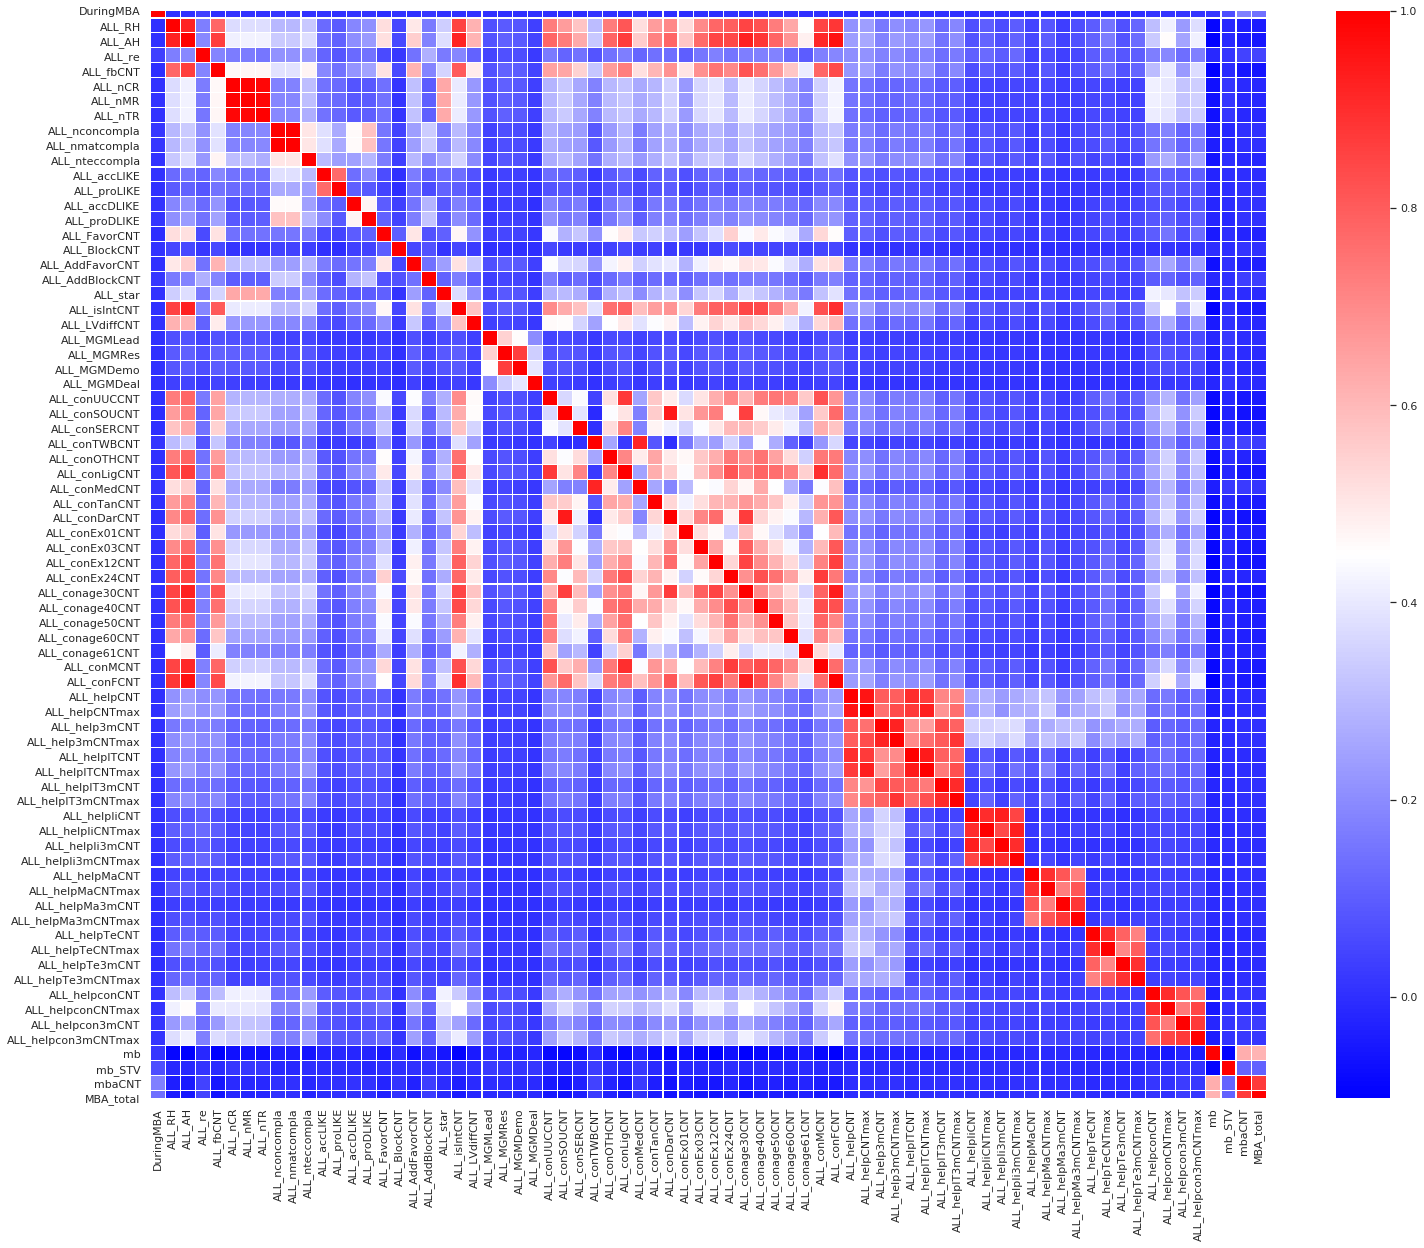

In [47]:
plt.figure(figsize=(25,20))
sns.heatmap(dff_plt1.astype(float).corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white',annot=False)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for mb')

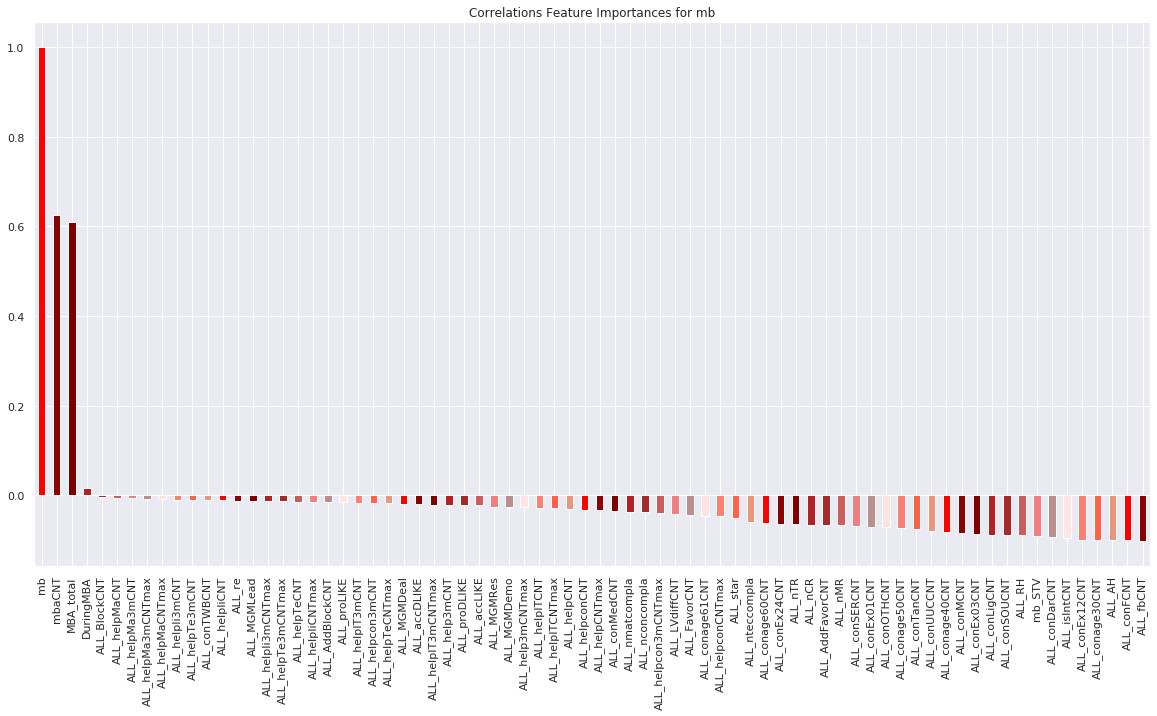

In [21]:
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']


plt.figure(figsize=(20,10))
dff_plt1.corr()['mb'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

## 針對一般欄位

In [45]:
dff_plt2.shape

(1500000, 76)

In [28]:
dff_plt2 = dff_test[['DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nconcompli', 'nmatcompla',
       'nmatcompli', 'nteccompla', 'accLIKE', 'proLIKE', 'accDLIKE',
       'proDLIKE', 'FavorCNT', 'BlockCNT', 'AddFavorCNT', 'AddBlockCNT',
       'star', 'isIntCNT', 'LVdiffCNT', 'MGMLead', 'MGMRes', 'MGMDemo',
       'MGMDeal', 'conUUCCNT', 'conSOUCNT', 'conSERCNT', 'conTWBCNT',
       'conOTHCNT', 'conLigCNT', 'conMedCNT', 'conTanCNT', 'conDarCNT',
       'conEx01CNT', 'conEx03CNT', 'conEx12CNT', 'conEx24CNT', 'conage30CNT',
       'conage40CNT', 'conage50CNT', 'conage60CNT', 'conage61CNT', 'conMCNT',
       'conFCNT', 'helpCNT', 'helpCNTmax', 'help3mCNT', 'help3mCNTmax',
       'helpITCNT', 'helpITCNTmax', 'helpIT3mCNT', 'helpIT3mCNTmax',
       'helpIiCNT', 'helpIiCNTmax', 'helpIi3mCNT', 'helpIi3mCNTmax',
       'helpMaCNT', 'helpMaCNTmax', 'helpMa3mCNT', 'helpMa3mCNTmax',
       'helpTeCNT', 'helpTeCNTmax', 'helpTe3mCNT', 'helpTe3mCNTmax',
       'helpconCNT', 'helpconCNTmax', 'helpcon3mCNT', 'helpcon3mCNTmax',  
       'mb', 'mb_STV',  'mbaCNT', 'MBA_total']]

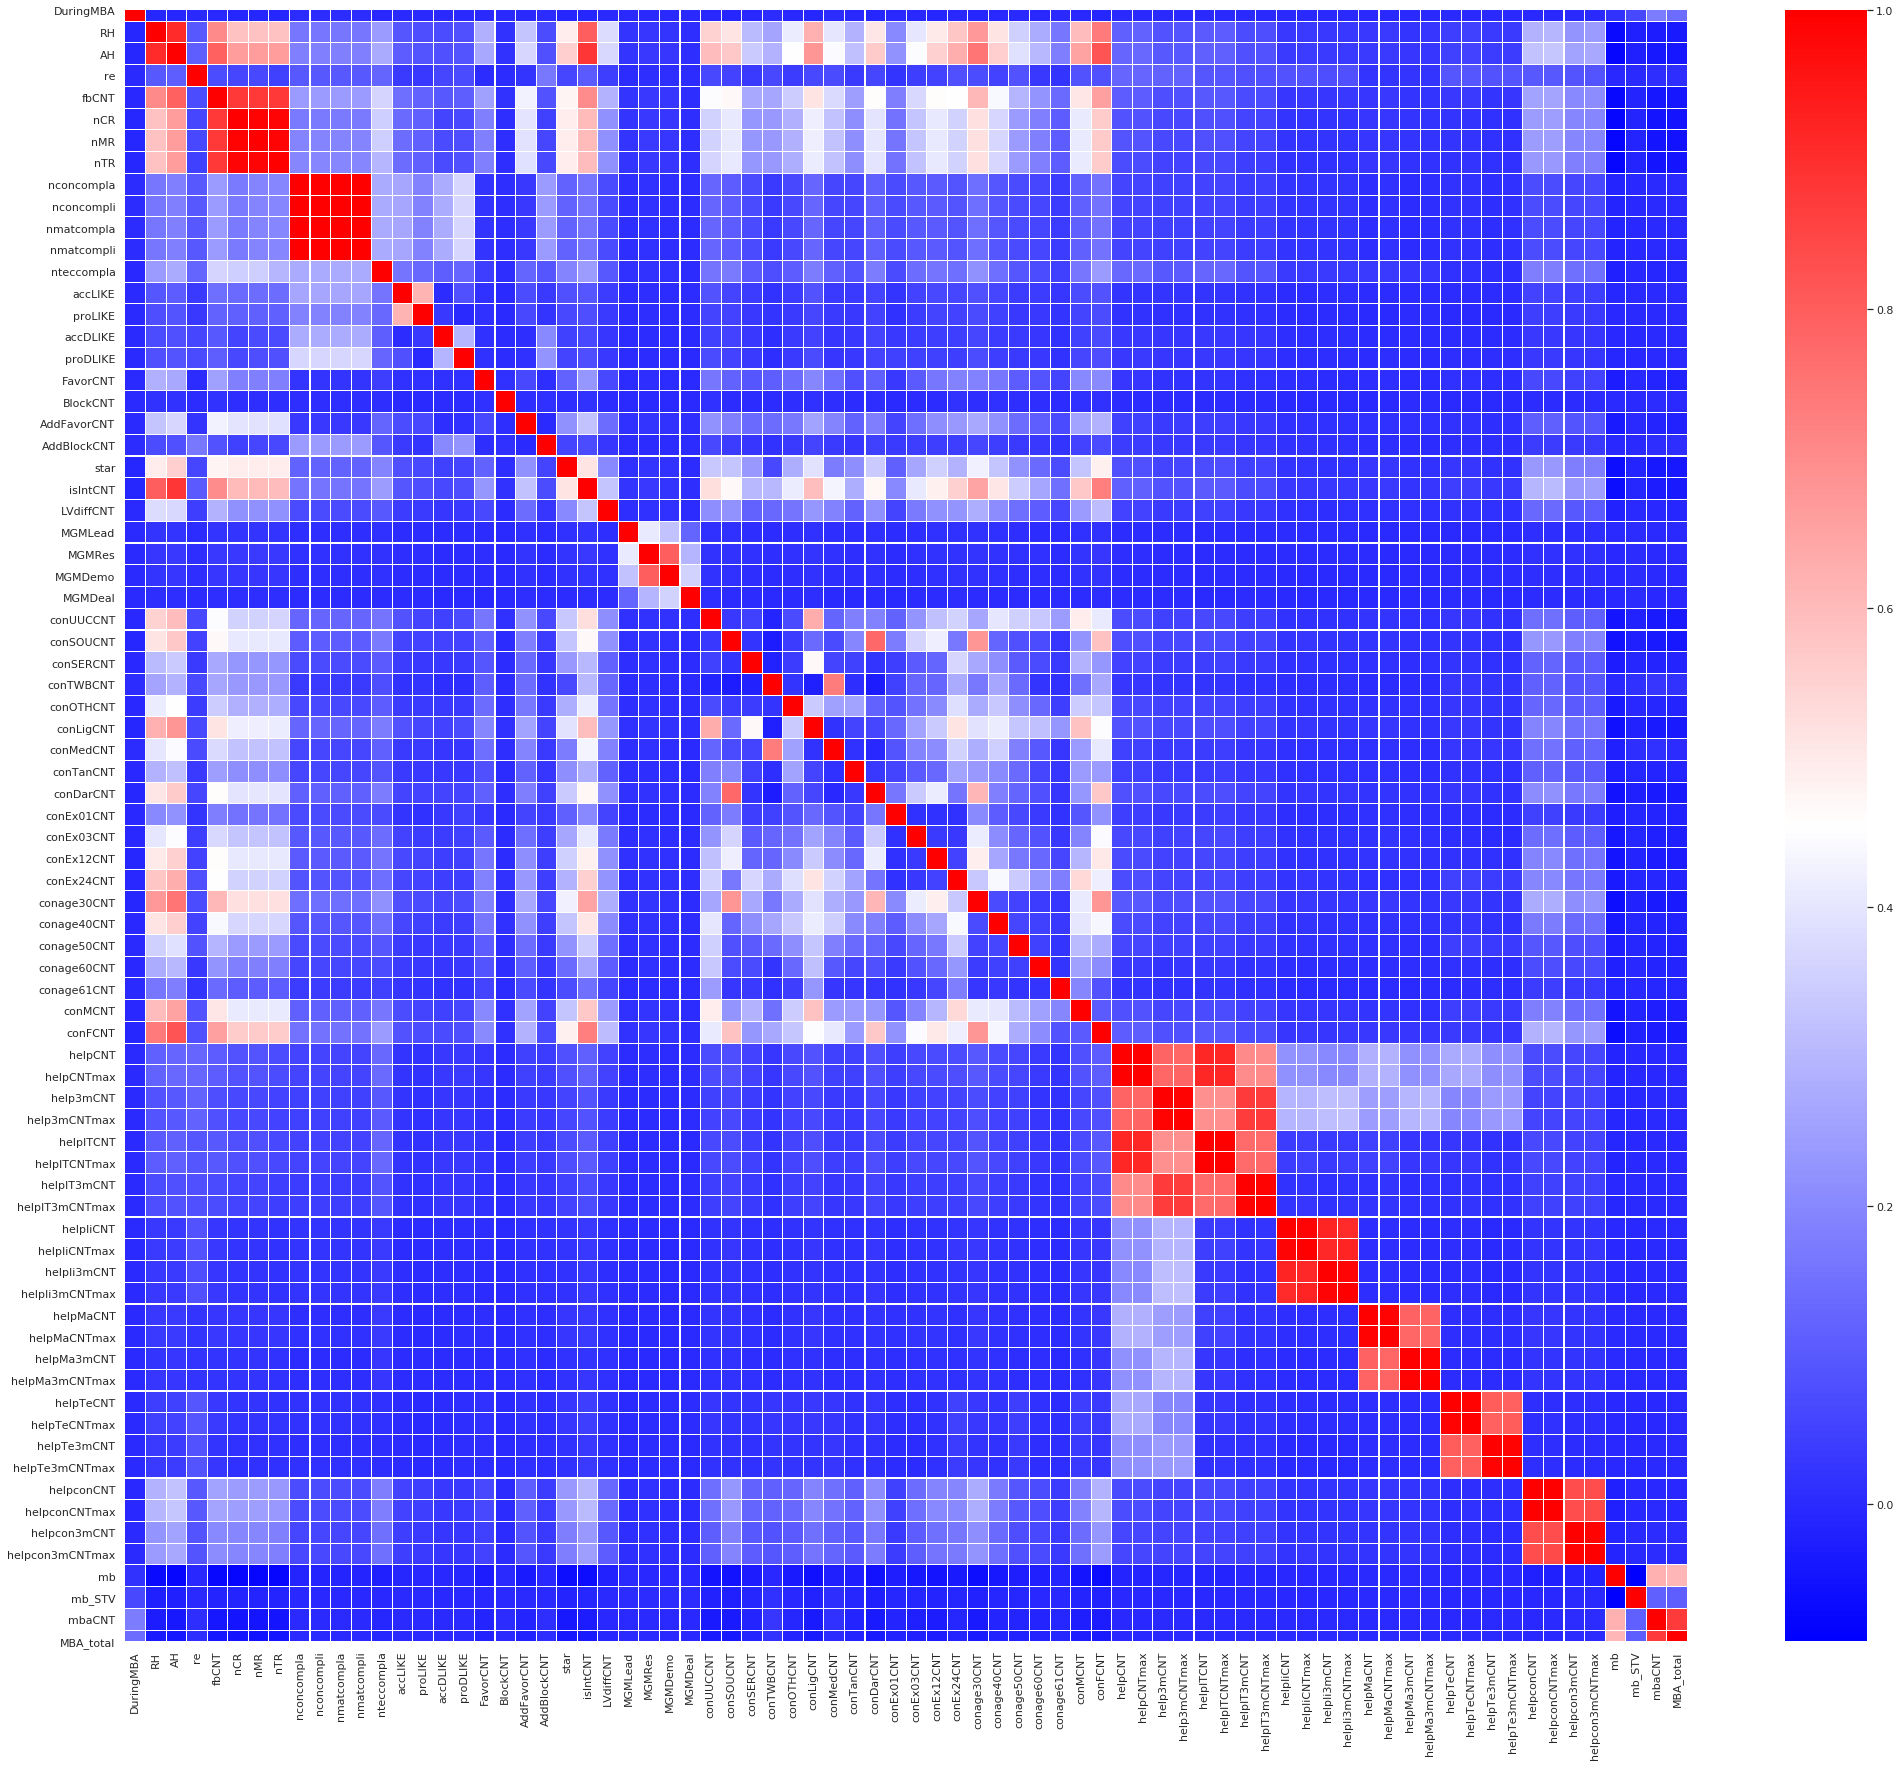

In [48]:
plt.figure(figsize=(35,30))
sns.heatmap(dff_plt2.astype(float).corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white',annot=False)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for mb')

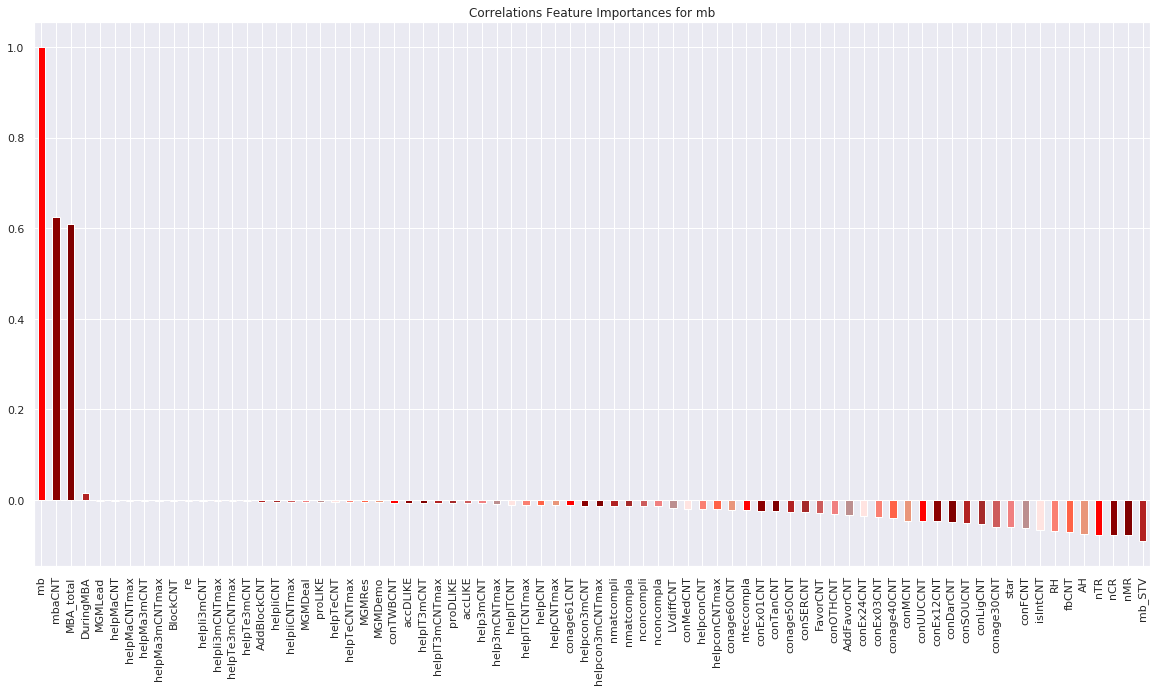

In [30]:
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']


plt.figure(figsize=(20,10))
dff_plt2.corr()['mb'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

## 針對L1D系列

In [49]:
dff_plt3 = dff_test[['DuringMBA', 'L1D_RH', 'L1D_AH', 'L1D_re',
       'L1D_fbCNT', 'L1D_nCR', 'L1D_nMR', 'L1D_nTR', 'L1D_nconcompla',
       'L1D_nconcompli', 'L1D_nmatcompla', 'L1D_nmatcompli', 'L1D_nteccompla',
       'L1D_accLIKE', 'L1D_proLIKE', 'L1D_accDLIKE', 'L1D_proDLIKE',
       'L1D_FavorCNT', 'L1D_BlockCNT', 'L1D_AddFavorCNT', 'L1D_AddBlockCNT',
       'L1D_star', 'L1D_isIntCNT', 'L1D_LVdiffCNT', 'L1D_MGMLead',
       'L1D_MGMRes', 'L1D_MGMDemo', 'L1D_MGMDeal', 'L1D_conUUCCNT',
       'L1D_conSOUCNT', 'L1D_conSERCNT', 'L1D_conTWBCNT', 'L1D_conOTHCNT',
       'L1D_conLigCNT', 'L1D_conMedCNT', 'L1D_conTanCNT', 'L1D_conDarCNT',
       'L1D_conEx01CNT', 'L1D_conEx03CNT', 'L1D_conEx12CNT', 'L1D_conEx24CNT',
       'L1D_conage30CNT', 'L1D_conage40CNT', 'L1D_conage50CNT',
       'L1D_conage60CNT', 'L1D_conage61CNT', 'L1D_conMCNT', 'L1D_conFCNT',
       'L1D_helpCNT', 'L1D_helpCNTmax', 'L1D_help3mCNT', 'L1D_help3mCNTmax',
       'L1D_helpITCNT', 'L1D_helpITCNTmax', 'L1D_helpIT3mCNT',
       'L1D_helpIT3mCNTmax', 'L1D_helpIiCNT', 'L1D_helpIiCNTmax',
       'L1D_helpIi3mCNT', 'L1D_helpIi3mCNTmax', 'L1D_helpMaCNT',
       'L1D_helpMaCNTmax', 'L1D_helpMa3mCNT', 'L1D_helpMa3mCNTmax',
       'L1D_helpTeCNT', 'L1D_helpTeCNTmax', 'L1D_helpTe3mCNT',
       'L1D_helpTe3mCNTmax', 'L1D_helpconCNT', 'L1D_helpconCNTmax',
       'L1D_helpcon3mCNT', 'L1D_helpcon3mCNTmax',  
       'mb', 'mb_STV',  'mbaCNT', 'MBA_total']]

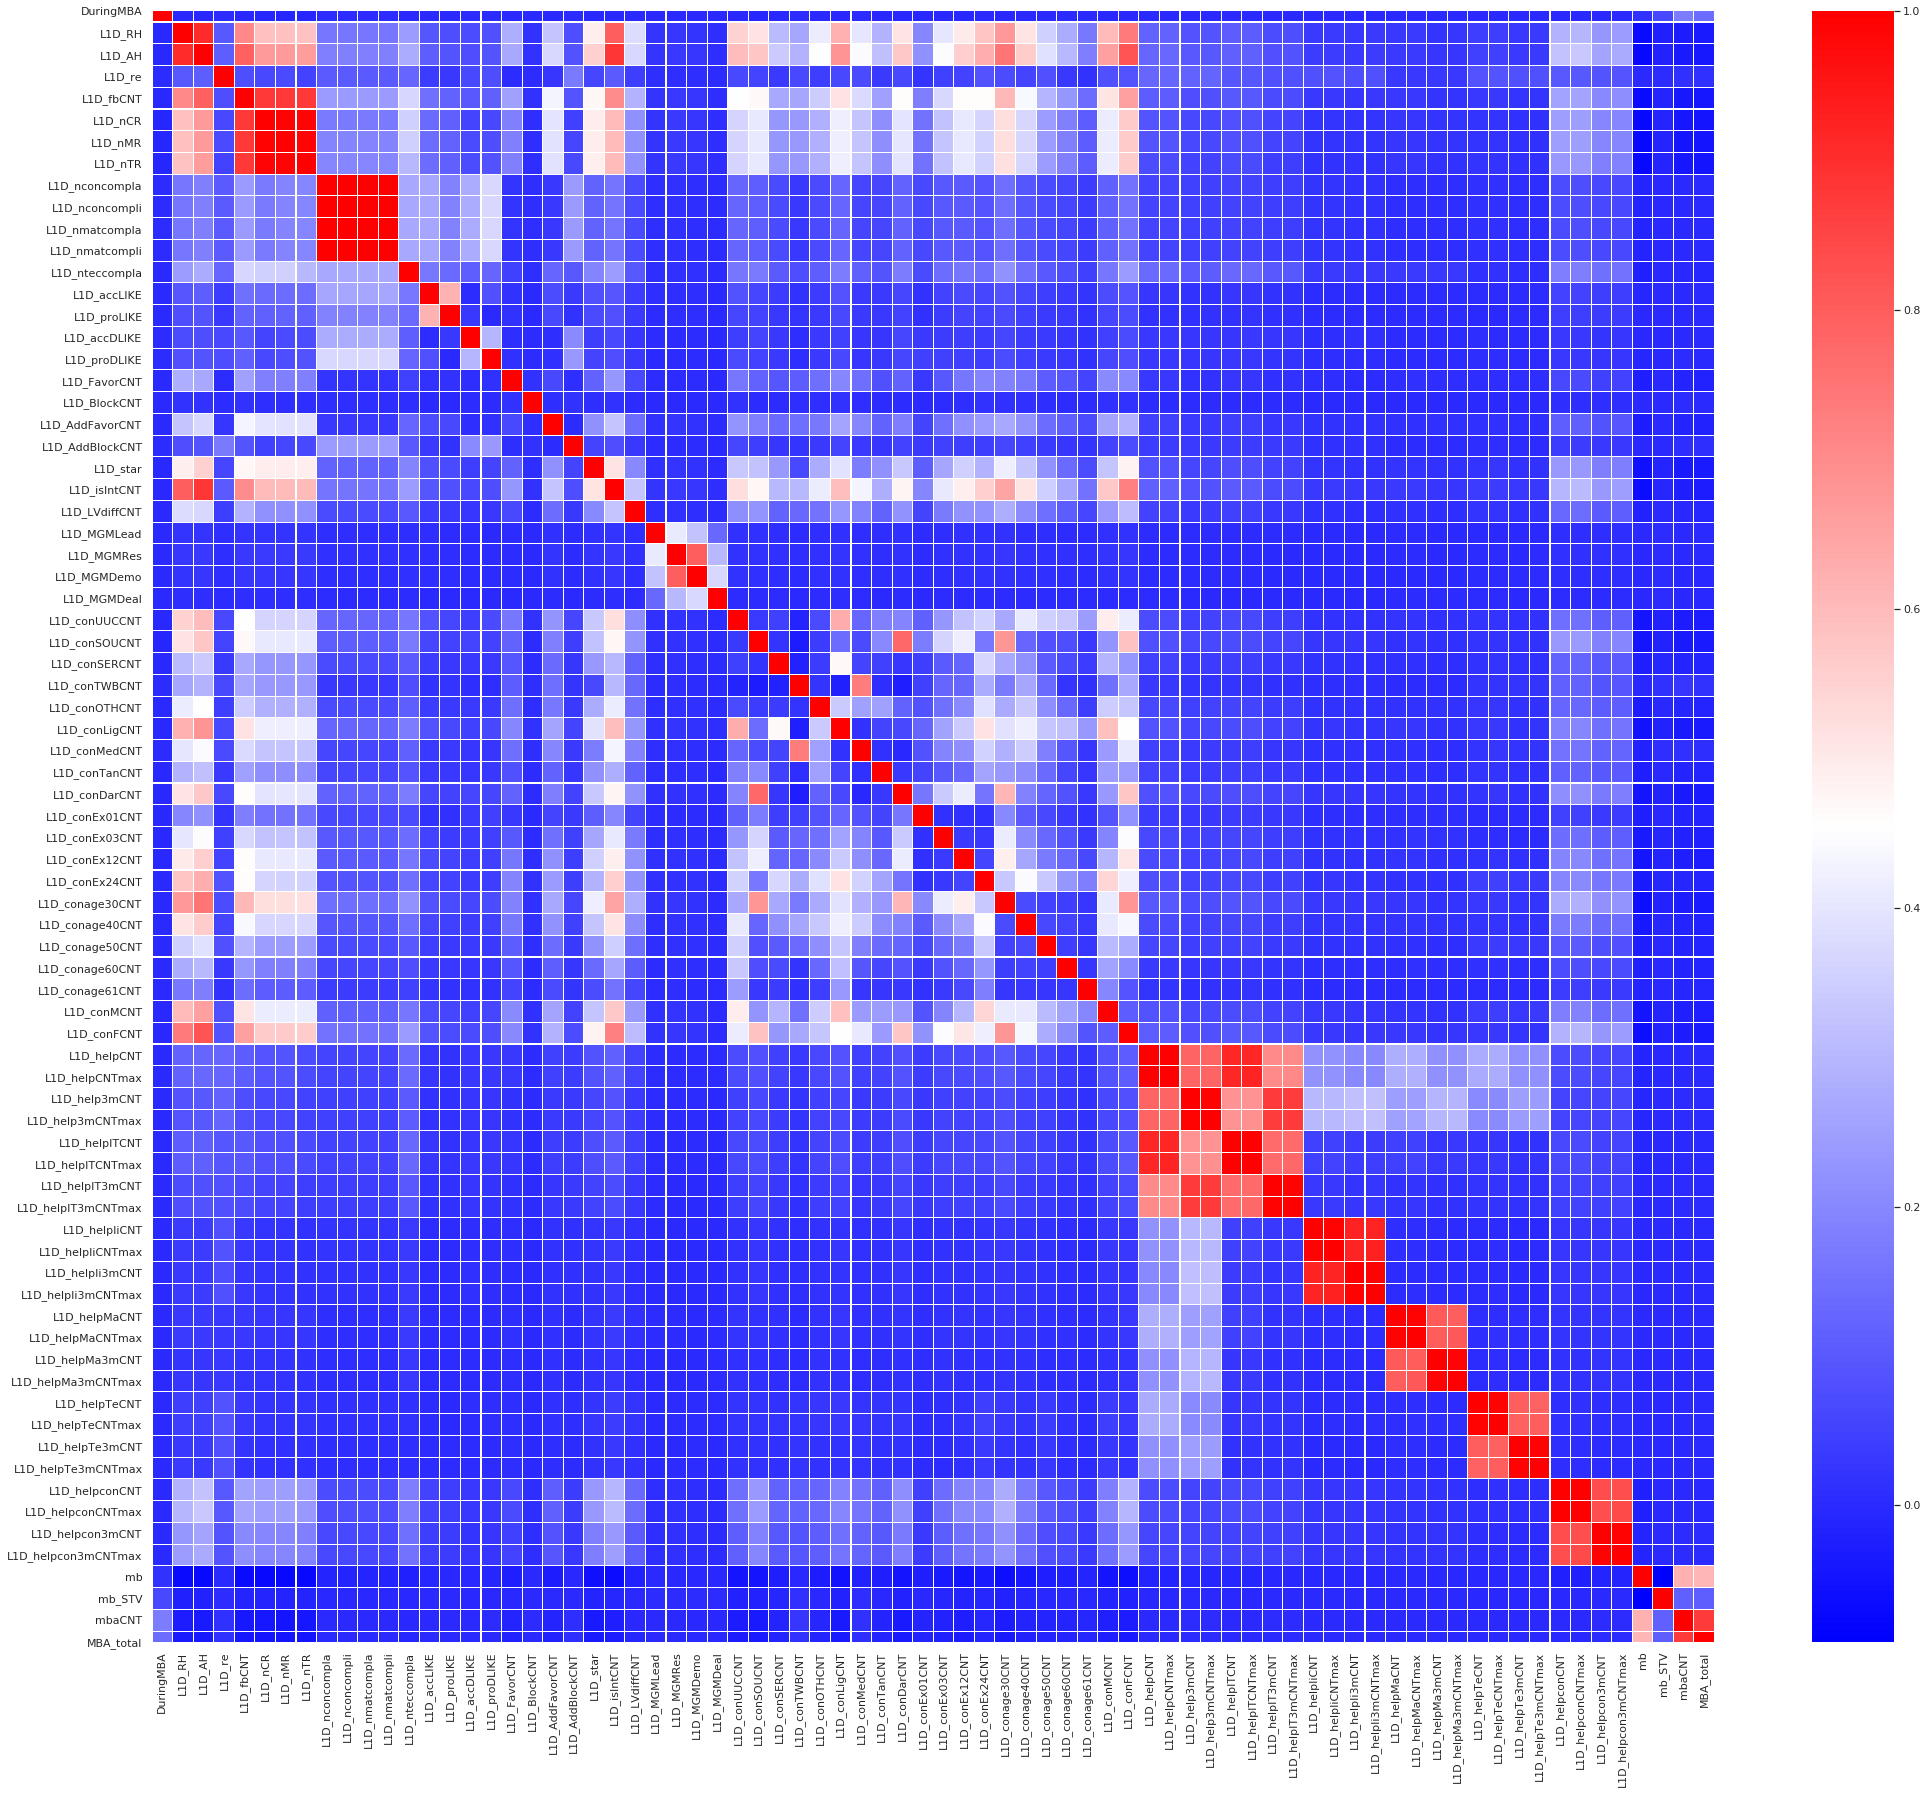

In [50]:
plt.figure(figsize=(35,30))
sns.heatmap(dff_plt3.astype(float).corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white',annot=False)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for mb')

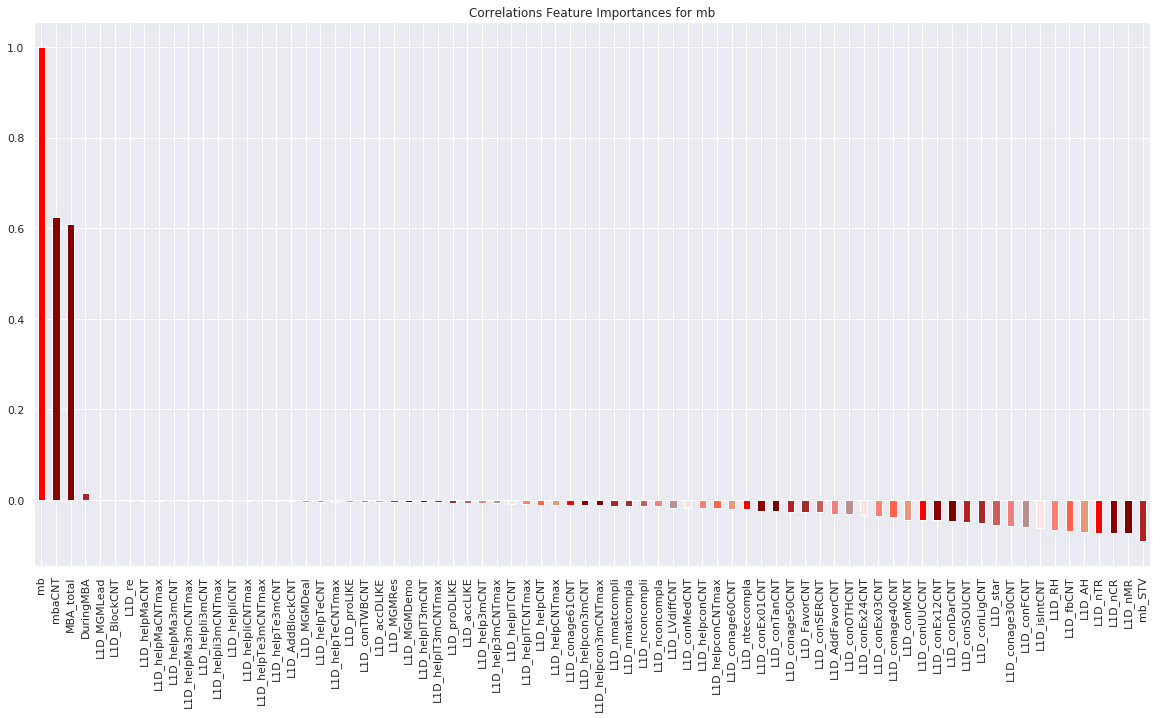

In [51]:
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']


plt.figure(figsize=(20,10))
dff_plt3.corr()['mb'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

## 針對時間點(DDwFD)觀察MB與否的分布狀況 (DDwFD vs All系列)
## 因為一般值沒有累加值在時間依序來看我認為沒有意義

In [20]:
df_DD = dff_test[['DDwFD',   'DuringMBA', 
       'ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR',
       'ALL_nTR', 'ALL_nconcompla', 'ALL_nmatcompla', 'ALL_nteccompla',
       'ALL_accLIKE', 'ALL_proLIKE', 'ALL_accDLIKE', 'ALL_proDLIKE',
       'ALL_FavorCNT', 'ALL_BlockCNT', 'ALL_AddFavorCNT', 'ALL_AddBlockCNT',
       'ALL_star', 'ALL_isIntCNT', 'ALL_LVdiffCNT', 'ALL_MGMLead',
       'ALL_MGMRes', 'ALL_MGMDemo', 'ALL_MGMDeal', 'ALL_conUUCCNT',
       'ALL_conSOUCNT', 'ALL_conSERCNT', 'ALL_conTWBCNT', 'ALL_conOTHCNT',
       'ALL_conLigCNT', 'ALL_conMedCNT', 'ALL_conTanCNT', 'ALL_conDarCNT',
       'ALL_conEx01CNT', 'ALL_conEx03CNT', 'ALL_conEx12CNT', 'ALL_conEx24CNT',
       'ALL_conage30CNT', 'ALL_conage40CNT', 'ALL_conage50CNT',
       'ALL_conage60CNT', 'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT',
       'ALL_helpCNT', 'ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax',
       'ALL_helpITCNT', 'ALL_helpITCNTmax', 'ALL_helpIT3mCNT',
       'ALL_helpIT3mCNTmax', 'ALL_helpIiCNT', 'ALL_helpIiCNTmax',
       'ALL_helpIi3mCNT', 'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT',
       'ALL_helpMaCNTmax', 'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax',
       'ALL_helpTeCNT', 'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT',
       'ALL_helpTe3mCNTmax', 'ALL_helpconCNT', 'ALL_helpconCNTmax',
       'ALL_helpcon3mCNT', 'ALL_helpcon3mCNTmax', 
        'mb', 'mb_STV',  'mbaCNT', 
        'MBA_total']]

Text(0, 0.5, 'Proportion')

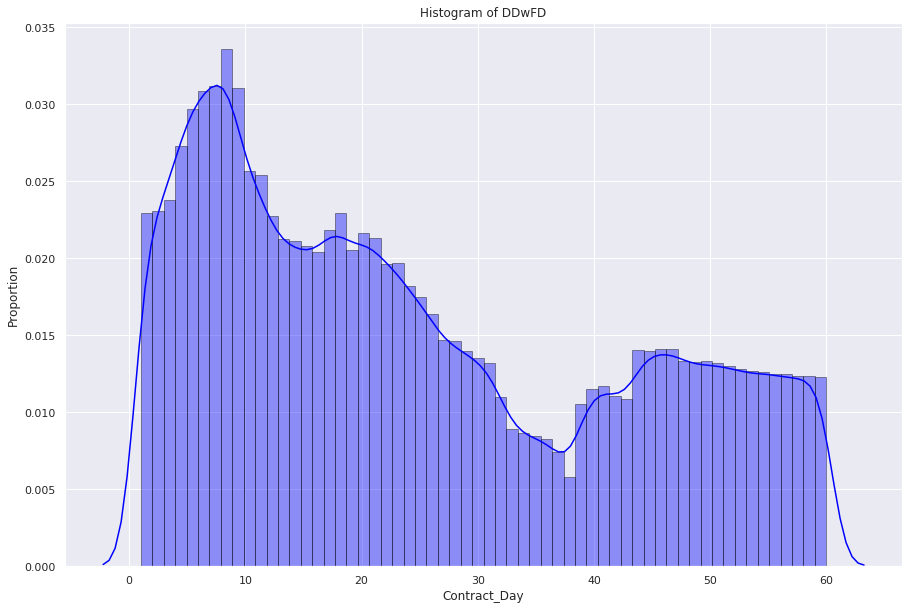

In [22]:
plt.figure(figsize=(15,10))
#plt.hist(df_DD['DDwFD'], color = 'blue', edgecolor = 'black',
         #bins = int(180/5))

# seaborn histogram
sns.distplot(df_DD['DDwFD'], hist=True, kde=True, 
             bins=int(60/1), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels

plt.title('Histogram of DDwFD')
plt.xlabel('Contract_Day')
plt.ylabel('Proportion')

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


Text(0.5, 1.0, 'Side-by-Side Histogram with mb')

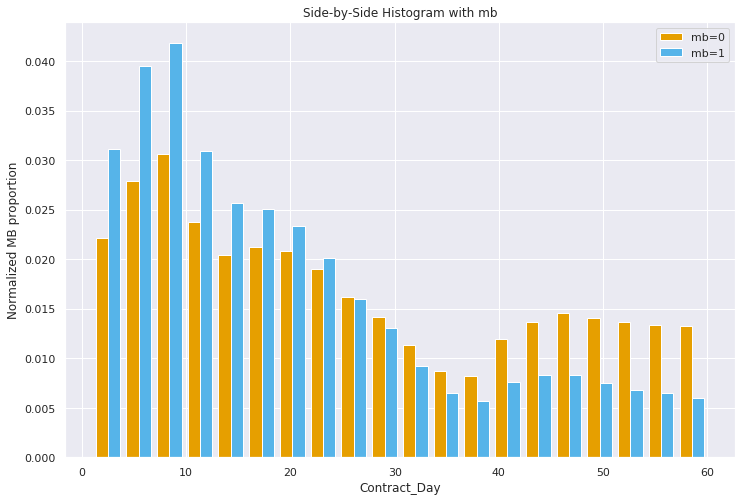

In [23]:
x1 = list(df_DD[df_DD['mb'] == 0]['DDwFD'])
x2 = list(df_DD[df_DD['mb'] == 1]['DDwFD'])

plt.figure(figsize=(12,8))
# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9']
names = ['mb=0', 'mb=1']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2], bins = int(60/3), normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Contract_Day')
plt.ylabel('Normalized MB proportion')
plt.title('Side-by-Side Histogram with mb')

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


([array([0.01941559, 0.02443932, 0.02681537, 0.02081537, 0.01790328,
         0.01864068, 0.01826305, 0.01666554, 0.01423299, 0.01243277,
         0.00990463, 0.00764791, 0.00720339, 0.01050486, 0.01193266,
         0.0128165 , 0.0123478 , 0.01198102, 0.01172859, 0.01160339]),
  array([0.02324814, 0.0292913 , 0.03195616, 0.02461333, 0.02105356,
         0.02172294, 0.02113831, 0.01914395, 0.01619209, 0.0140339 ,
         0.01103254, 0.00844949, 0.00789944, 0.01144384, 0.01296023,
         0.01384407, 0.01327254, 0.01282237, 0.01252136, 0.0123435 ])],
 array([ 1.  ,  3.95,  6.9 ,  9.85, 12.8 , 15.75, 18.7 , 21.65, 24.6 ,
        27.55, 30.5 , 33.45, 36.4 , 39.35, 42.3 , 45.25, 48.2 , 51.15,
        54.1 , 57.05, 60.  ]),
 <a list of 2 Lists of Patches objects>)

<Figure size 864x576 with 0 Axes>

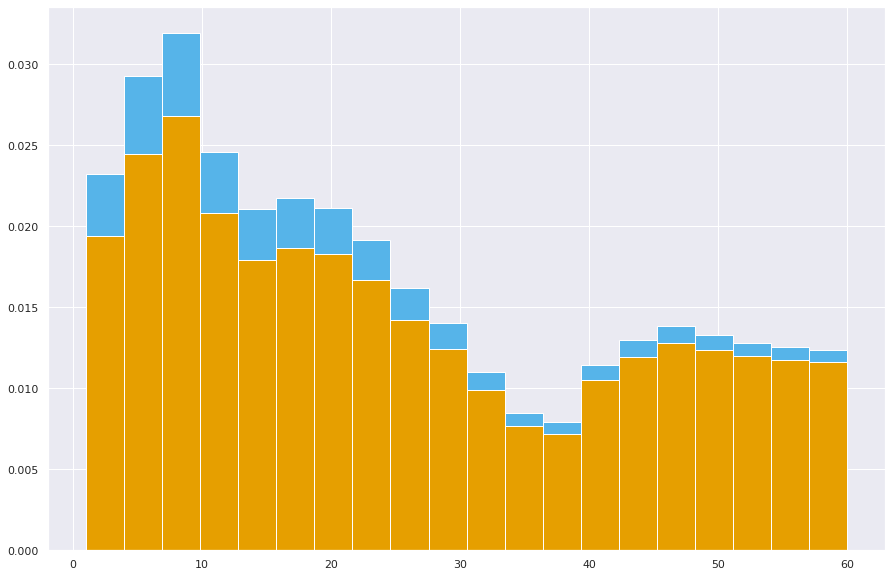

In [24]:
x1 = list(df_DD[df_DD['mb'] == 0]['DDwFD'])
x2 = list(df_DD[df_DD['mb'] == 1]['DDwFD'])

plt.figure(figsize=(12,8))
# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9']
names = ['mb=0', 'mb=1']

plt.figure(figsize=(15,10))
plt.hist([x1, x2], bins = int(60/3), stacked=True,
         normed=True, color = colors, label=['mb=0', 'mb=1'])

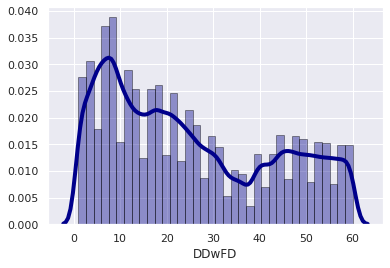

In [93]:
sns.distplot(df_DD['DDwFD'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Text(0, 0.5, 'Density')

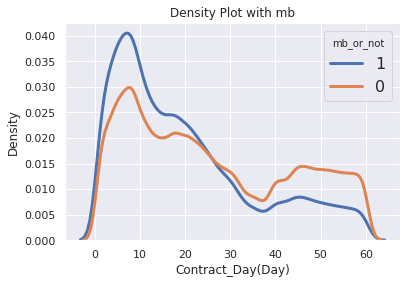

In [106]:
mbs = [1, 0]

# Iterate through the five airlines
for m in mbs:
    # Subset to the airline
    subset = df_DD[df_DD['mb'] == m]
    
    # Draw the density plot
    sns.distplot(subset['DDwFD'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = m)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'mb_or_not')
plt.title('Density Plot with mb')
plt.xlabel('Contract_Day(Day)')
plt.ylabel('Density')

In [228]:
dff_final = dff_test[['DDwFD', 'DuringMBA', 'RH', 'AH', 're', 'fbCNT', 'nCR', 'nMR', 'nTR',
       'nconcompla', 'nconcompli', 'nmatcompla', 'nmatcompli', 'nteccompla',
       'accLIKE', 'proLIKE', 'accDLIKE', 'proDLIKE', 'FavorCNT', 'BlockCNT',
       'AddFavorCNT', 'AddBlockCNT', 'star', 'isIntCNT', 'LVdiffCNT',
       'MGMLead', 'MGMRes', 'MGMDemo', 'MGMDeal', 'conUUCCNT', 'conSOUCNT',
       'conSERCNT', 'conTWBCNT', 'conOTHCNT', 'conLigCNT', 'conMedCNT',
       'conTanCNT', 'conDarCNT', 'conEx01CNT', 'conEx03CNT', 'conEx12CNT',
       'conEx24CNT', 'conage30CNT', 'conage40CNT', 'conage50CNT',
       'conage60CNT', 'conage61CNT', 'conMCNT', 'conFCNT', 'helpCNT',
       'helpCNTmax', 'help3mCNT', 'help3mCNTmax', 'helpITCNT', 'helpITCNTmax',
       'helpIT3mCNT', 'helpIT3mCNTmax', 'helpIiCNT', 'helpIiCNTmax',
       'helpIi3mCNT', 'helpIi3mCNTmax', 'helpMaCNT', 'helpMaCNTmax',
       'helpMa3mCNT', 'helpMa3mCNTmax', 'helpTeCNT', 'helpTeCNTmax',
       'helpTe3mCNT', 'helpTe3mCNTmax', 'helpconCNT', 'helpconCNTmax',
       'helpcon3mCNT', 'helpcon3mCNTmax', 'ALL_RH', 'ALL_AH', 'ALL_re',
       'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR', 'ALL_nTR', 'ALL_nconcompla',
       'ALL_nmatcompla', 'ALL_nteccompla', 'ALL_accLIKE', 'ALL_proLIKE',
       'ALL_accDLIKE', 'ALL_proDLIKE', 'ALL_FavorCNT', 'ALL_BlockCNT',
       'ALL_AddFavorCNT', 'ALL_AddBlockCNT', 'ALL_star', 'ALL_isIntCNT',
       'ALL_LVdiffCNT', 'ALL_MGMLead', 'ALL_MGMRes', 'ALL_MGMDemo',
       'ALL_MGMDeal', 'ALL_conUUCCNT', 'ALL_conSOUCNT', 'ALL_conSERCNT',
       'ALL_conTWBCNT', 'ALL_conOTHCNT', 'ALL_conLigCNT', 'ALL_conMedCNT',
       'ALL_conTanCNT', 'ALL_conDarCNT', 'ALL_conEx01CNT', 'ALL_conEx03CNT',
       'ALL_conEx12CNT', 'ALL_conEx24CNT', 'ALL_conage30CNT',
       'ALL_conage40CNT', 'ALL_conage50CNT', 'ALL_conage60CNT',
       'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT', 'ALL_helpCNT',
       'ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax', 'ALL_helpITCNT',
       'ALL_helpITCNTmax', 'ALL_helpIT3mCNT', 'ALL_helpIT3mCNTmax',
       'ALL_helpIiCNT', 'ALL_helpIiCNTmax', 'ALL_helpIi3mCNT',
       'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT', 'ALL_helpMaCNTmax',
       'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax', 'ALL_helpTeCNT',
       'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT', 'ALL_helpTe3mCNTmax',
       'ALL_helpconCNT', 'ALL_helpconCNTmax', 'ALL_helpcon3mCNT',
       'ALL_helpcon3mCNTmax', 
        'mb', 'mb_STV', 'mbaCNT', 'MBA_total', 'mbadiff',
       'mbtime', 'mbaFtoSelltime', 'mbaNtoSelltime', 'mbFdiff', 'mbNdiff']]

In [229]:
dff_time['mbadiff'] = dff_time['mbadiff'].dt.total_seconds()/86400
dff_time['mbtime'] = dff_time['mbtime'].dt.total_seconds()/86400
dff_time['mbaFtoSelltime'] = dff_time['mbaFtoSelltime'].dt.total_seconds()/86400
dff_time['mbaNtoSelltime'] = dff_time['mbaNtoSelltime'].dt.total_seconds()/86400
dff_time['mbFdiff'] = dff_time['mbFdiff'].dt.total_seconds()/86400
dff_time['mbNdiff'] = dff_time['mbNdiff'].dt.total_seconds()/86400

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [258]:
#mb為1(退者者) ; 且通報 1次以上
dff_time_fix_0 = dff_time[dff_time['mb']==1][dff_time['mbaCNT']>=1.0]

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [241]:
dff_time_fix.head()

,DDwFD,DuringMBA,RH,AH,re,fbCNT,nCR,nMR,nTR,nconcompla,nconcompli,nmatcompla,nmatcompli,nteccompla,accLIKE,proLIKE,accDLIKE,proDLIKE,FavorCNT,BlockCNT,AddFavorCNT,AddBlockCNT,star,isIntCNT,LVdiffCNT,MGMLead,MGMRes,MGMDemo,MGMDeal,conUUCCNT,conSOUCNT,conSERCNT,conTWBCNT,conOTHCNT,conLigCNT,conMedCNT,conTanCNT,conDarCNT,conEx01CNT,conEx03CNT,conEx12CNT,conEx24CNT,conage30CNT,conage40CNT,conage50CNT,conage60CNT,conage61CNT,conMCNT,conFCNT,helpCNT,helpCNTmax,help3mCNT,help3mCNTmax,helpITCNT,helpITCNTmax,helpIT3mCNT,helpIT3mCNTmax,helpIiCNT,helpIiCNTmax,helpIi3mCNT,helpIi3mCNTmax,helpMaCNT,helpMaCNTmax,helpMa3mCNT,helpMa3mCNTmax,helpTeCNT,helpTeCNTmax,helpTe3mCNT,helpTe3mCNTmax,helpconCNT,helpconCNTmax,helpcon3mCNT,helpcon3mCNTmax,ALL_RH,ALL_AH,ALL_re,ALL_fbCNT,ALL_nCR,ALL_nMR,ALL_nTR,ALL_nconcompla,ALL_nmatcompla,ALL_nteccompla,ALL_accLIKE,ALL_proLIKE,ALL_accDLIKE,ALL_proDLIKE,ALL_FavorCNT,ALL_BlockCNT,ALL_AddFavorCNT,ALL_AddBlockCNT,ALL_star,ALL_isIntCNT,ALL_LVdiffCNT,ALL_MGMLead,ALL_MGMRes,ALL_MGMDemo,ALL_MGMDeal,ALL_conUUCCNT,ALL_conSOUCNT,ALL_conSERCNT,ALL_conTWBCNT,ALL_conOTHCNT,ALL_conLigCNT,ALL_conMedCNT,ALL_conTanCNT,ALL_conDarCNT,ALL_conEx01CNT,ALL_conEx03CNT,ALL_conEx12CNT,ALL_conEx24CNT,ALL_conage30CNT,ALL_conage40CNT,ALL_conage50CNT,ALL_conage60CNT,ALL_conage61CNT,ALL_conMCNT,ALL_conFCNT,ALL_helpCNT,ALL_helpCNTmax,ALL_help3mCNT,ALL_help3mCNTmax,ALL_helpITCNT,ALL_helpITCNTmax,ALL_helpIT3mCNT,ALL_helpIT3mCNTmax,ALL_helpIiCNT,ALL_helpIiCNTmax,ALL_helpIi3mCNT,ALL_helpIi3mCNTmax,ALL_helpMaCNT,ALL_helpMaCNTmax,ALL_helpMa3mCNT,ALL_helpMa3mCNTmax,ALL_helpTeCNT,ALL_helpTeCNTmax,ALL_helpTe3mCNT,ALL_helpTe3mCNTmax,ALL_helpconCNT,ALL_helpconCNTmax,ALL_helpcon3mCNT,ALL_helpcon3mCNTmax,mb,mb_STV,mbaCNT,MBA_total,mbadiff,mbtime,mbaFtoSelltime,mbaNtoSelltime,mbFdiff,mbNdiff
20,43,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,3.0,9.0,9.0,9.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,11.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,6.0,3.0,4.0,8.0,0.0,0.0,0.0,2.0,7.0,3.0,4.0,4.0,2.0,1.0,1.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.0,1,1.0,1.0,1.0,0.0,93.0,91.0,91.0,2.0,2.0
22,43,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1,1.0,1.0,1.0,0.0,44.0,6.0,6.0,38.0,38.0
25,40,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,15.0,0.0,5.0,9.4,10.0,8.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,13.0,2.0,0.0,0.0,0.0,0.0,2.0,6.0,2.0,0.0,5.0,5.0,4.0,4.0,2.0,0.0,5.0,0.0,8.0,11.0,2.0,2.0,0.0,0.0,5.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.500000,8.0,2.5,6.0,1,1.0,2.0,1.0,116.0,124.0,4.0,120.0,120.0,4.0
31,40,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0

In [251]:
(dff_time_fix['mbtime'].max()-dff_time_fix['mbtime'].min())/10

36.900000000000006

"plt.title('Histogram of DDwFD')\nplt.xlabel('Contract_Day')\nplt.ylabel('Proportion')"

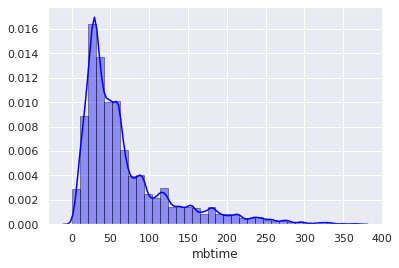

In [245]:
#plt.hist(df_DD['DDwFD'], color = 'blue', edgecolor = 'black',
         #bins = int(180/5))

# seaborn histogram
sns.distplot(dff_time_fix['mbtime'], hist=True, kde=True, 
             bins=int((dff_time_fix['mbtime'].max()-dff_time_fix['mbtime'].min())/10), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels

'''plt.title('Histogram of DDwFD')
plt.xlabel('Contract_Day')
plt.ylabel('Proportion')'''

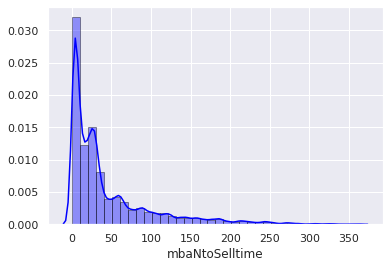

In [246]:
sns.distplot(dff_time_fix['mbaNtoSelltime'], hist=True, kde=True, 
             bins=int((dff_time_fix['mbaNtoSelltime'].max()-dff_time_fix['mbaNtoSelltime'].min())/10), color = 'blue',
             hist_kws={'edgecolor':'black'})

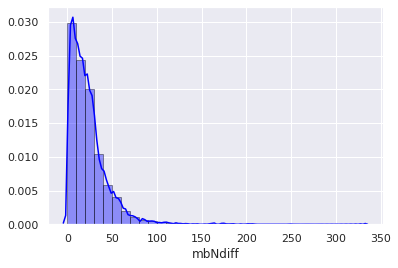

In [259]:
sns.distplot(dff_time_fix_0['mbNdiff'], hist=True, kde=True, 
             bins=int((dff_time_fix_0['mbNdiff'].max()-dff_time_fix_0['mbNdiff'].min())/10), color = 'blue',
             hist_kws={'edgecolor':'black'})

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


"plt.legend(prop={'size': 16}, title = 'mb_or_not')\nplt.title('Density Plot with mb')\nplt.xlabel('Contract_Day(Day)')\nplt.ylabel('Density')"

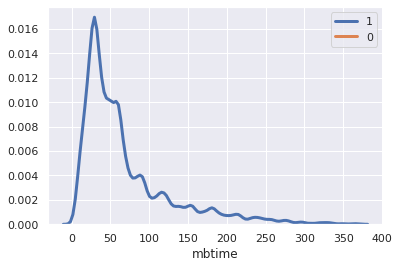

In [248]:
mbs = [1, 0]

# Iterate through the five airlines
for m in mbs:
    # Subset to the airline
    subset = dff_time[dff_time['mb'] == m]
    
    # Draw the density plot
    sns.distplot(subset['mbtime'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = m)
    
# Plot formatting
'''plt.legend(prop={'size': 16}, title = 'mb_or_not')
plt.title('Density Plot with mb')
plt.xlabel('Contract_Day(Day)')
plt.ylabel('Density')'''